## Multi Layer Perceptron Regression Intervals

### Preprocessing the Monthly Aggregated Data.

First we import the necessary packages. We then create the dataset by defing the *create_lag* function and use it to make the dataset we want.



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import datetime as dt

In [2]:
import os
cwd = os.getcwd()
os.chdir('C:\\Users\\ekoulier\\Desktop\\GGD\\New Data\\Central_Folder')
data = pd.read_csv('br_regions_gt.csv')
data = data[['HVB', 'Date', 'WB', 'BZO', 'Trends']]
os.chdir(cwd)

In [3]:
data.head()

,HVB,Date,WB,BZO,Trends
0,29,2004-01,3,20,0
1,26,2004-02,12,11,0
2,43,2004-03,5,23,57
3,22,2004-04,8,44,47
4,41,2004-05,18,39,0


We make the create_lag function in order to create the dataset that contains the time lags.

In [4]:
def create_lag(df, n_lags):
    """
    Manipulates the dataset in order to create time lags for 'HVB', 'WB', 'BZO' and 'Trends'.
    """
    
    assert type(n_lags) == int
 
    for i in ['HVB', 'WB', 'BZO', 'Trends']:
        for j in range(1, n_lags + 1):
            df[i+'-'+str(j)] = df[i].shift(j)
        df[i+'+1'] = df[i].shift(-1)
        
    # We dont need to forecast the google trends    
    del df['Trends+1']
    
    # Due to the shift that creates nans, we delete the first n_lags rows and the last row.
    df = df[n_lags:].reset_index(drop = True)
    df = df[:-1]
    
    return df

In [5]:
data2 = data.copy()
data2 = data2[18:]
data2 = create_lag(data2, 4)

In [6]:
data2['Date'] = pd.to_datetime(data2['Date'], format = '%Y-%m')

In [7]:
data2.tail(n = 5)

,HVB,Date,WB,BZO,Trends,HVB-1,HVB-2,HVB-3,HVB-4,HVB+1,...,WB+1,BZO-1,BZO-2,BZO-3,BZO-4,BZO+1,Trends-1,Trends-2,Trends-3,Trends-4
140,59,2017-07-01,17,18,17,80.0,39.0,53.0,61.0,44.0,...,24.0,13.0,21.0,12.0,4.0,12.0,19.0,19.0,23.0,15.0
141,44,2017-08-01,24,12,8,59.0,80.0,39.0,53.0,58.0,...,36.0,18.0,13.0,21.0,12.0,11.0,17.0,19.0,19.0,23.0
142,58,2017-09-01,36,11,19,44.0,59.0,80.0,39.0,27.0,...,22.0,12.0,18.0,13.0,21.0,10.0,8.0,17.0,19.0,19.0
143,27,2017-10-01,22,10,21,58.0,44.0,59.0,80.0,23.0,...,23.0,11.0,12.0,18.0,13.0,10.0,19.0,8.0,17.0,19.0
144,23,2017-11-01,23,10,19,27.0,58.0,44.0,59.0,21.0,...,16.0,10.0,11.0,12.0,18.0,13.0,21.0,19.0,8.0,17.0


The Dataframe is ready. <br/>
Now we use the features X and target y. Apart from that, we use the train_test_split to separate our models. <br/>
We also use the train test split in the X_train and y_train to create a validation set.

### Multi-Layer Perceptron Architectures

#### Using two time lags.

We first test our network using two time lags. We will decide later if we should add more features. <br/>
Before everything we initialize the numpy seed.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from keras.optimizers import Adam
from keras.losses import mean_squared_error


Using TensorFlow backend.


In [9]:
X = data2[['HVB', 'HVB-1', 'HVB-2', 'HVB-3',  
          'WB', 'WB-1', 'WB-2', 'WB-3', 
          'BZO', 'BZO-1', 'BZO-2', 'BZO-3', 
          'Trends', 'Trends-1']]

y = data2[['HVB+1', 'WB+1', 'BZO+1']]

In [10]:
X_T, X_test, y_T, y_test = train_test_split(X, y, test_size = 0.33, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_T, y_T, test_size = 0.2, shuffle = True)

In [11]:
y_test.head()

,HVB+1,WB+1,BZO+1
97,32.0,43.0,10.0
98,28.0,23.0,17.0
99,40.0,31.0,12.0
100,34.0,63.0,26.0
101,38.0,66.0,12.0


In [12]:
pred_t = data2['Date'][len(data2['Date'])-len(y_test):]#.reset_index(drop = True)

In [13]:
data2['Date'][0]

Timestamp('2005-11-01 00:00:00')

In [14]:
data2['Date'][len(data2['Date'])-len(y_test)]

Timestamp('2013-12-01 00:00:00')

In [15]:
type(pred_t)

pandas.core.series.Series

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [17]:
model_2a = Sequential()

# First layer
model_2a.add(Dense(X_train.shape[1] - 6, input_dim = X_train.shape[1]))
model_2a.add(Activation('linear'))
model_2a.add(Dropout(0.1))

# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_2a.add(Dense(X_train.shape[1] - 6))
model_2a.add(Activation('linear'))
model_2a.add(Dropout(0.2))

model_2a.add(Dense(X_train.shape[1] - 8))
model_2a.add(Activation('linear'))
model_2a.add(Dropout(0.12))


# Final layer
model_2a.add(Dense(y_train.shape[1]))

model_2a.compile(loss = mean_squared_error,  optimizer = 'adam', metrics = ['mse', 'accuracy'])
# Print the parameters
model_2a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
__________

In [18]:
class NN_Modeling(object):
    def __init__(self, model, X_train, X_val, X_test, y_train, y_val, y_test, pred_time):
        '''
        params
        model : Keras Sequential Model. Needs to be already compiled, otherwise it will not run.
        X_train, X_val, X_test, y_train, y_val, y_test are created using sklearn's function train_test_split
        pred_time: is the y_test data time interval given in Timestamps. This is done just to make the plots.
        '''

        self.model = model
        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        self.pred_time = pred_time

        self.r2_array = []

        self.predictions_HVB = pd.DataFrame()
        self.predictions_WB = pd.DataFrame()
        self.predictions_BZO = pd.DataFrame()

    def train_model(self, epochs, times, NBest_Perf, Perf):
        '''
        Times : Number of times to train and test the model.
        NBest_Perf : Number of top sucessful trainings.
        '''

        assert times >= 5

        for time in range(times):
            # Train the model and get the predictions

            self.model.fit(self.X_train, self.y_train, epochs=epochs, validation_data=(self.X_val, self.y_val))
            y_predict = np.round(self.model.predict(X_test))

            # Update the dataframes

            self.predictions_HVB[time] = y_predict[:, 0]
            self.predictions_WB[time] = y_predict[:, 1]
            self.predictions_BZO[time] = y_predict[:, 2]

            # Update the r2_array
            self.r2_array.append(r2_score(y_test, y_predict))

        # We are now out of the loop and we select the best predictions

        r2_np_array = np.array(self.r2_array)
        Best_Perf_list = list(r2_np_array.argsort()[-NBest_Perf:][::-1])

        # Select the best predictions for the dataframes

        self.predictions_HVB = self.predictions_HVB[Best_Perf_list]
        self.predictions_WB = self.predictions_WB[Best_Perf_list]
        self.predictions_BZO = self.predictions_BZO[Best_Perf_list]

        # Broaden the Interval

        # Make the average prediction

        self.predictions_HVB['Average'] = self.predictions_HVB[Best_Perf_list].sum(axis=1) / NBest_Perf
        self.predictions_WB['Average'] = self.predictions_WB[Best_Perf_list].sum(axis=1) / NBest_Perf
        self.predictions_BZO['Average'] = self.predictions_BZO[Best_Perf_list].sum(axis=1) / NBest_Perf

        # Make the Min of predictions

        self.predictions_HVB['Min'] = self.predictions_HVB[Best_Perf_list].min(axis=1) - Perf
        self.predictions_WB['Min'] = self.predictions_WB[Best_Perf_list].min(axis=1) - Perf
        self.predictions_BZO['Min'] = self.predictions_BZO[Best_Perf_list].min(axis=1) - Perf

        # Make the Max of predictions

        self.predictions_HVB['Max'] = self.predictions_HVB[Best_Perf_list].max(axis=1) + Perf
        self.predictions_WB['Max'] = self.predictions_WB[Best_Perf_list].max(axis=1) + Perf
        self.predictions_BZO['Max'] = self.predictions_BZO[Best_Perf_list].max(axis=1) + Perf
    def plot_boundaries(self, ggd):

        assert ggd in ['HVB', 'WB', 'BZO']

        if ggd == 'HVB':
            df = self.predictions_HVB
        elif ggd == 'WB':
            df = self.predictions_WB
        else:
            df = self.predictions_BZO

        upper_bound = go.Scatter(
            name='Upper Bound',
            x=self.pred_time,
            y=df['Max'],
            mode='lines',
            marker=dict(color="444"),
            line=dict(width=0),
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty')

        trace = go.Scatter(
            name='Average',
            x=self.pred_time,
            y=df['Average'],
            mode='lines',
            line=dict(color='rgb(31, 119, 180)'),
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty')

        lower_bound = go.Scatter(
            name='Lower Bound',
            x=self.pred_time,
            y=df['Min'],
            marker=dict(color="444"),
            line=dict(width=0),
            mode='lines')

        data = [lower_bound, trace, upper_bound]

        layout = go.Layout(
            yaxis=dict(title='Predictions'),
            title='Prediction Intervals',
            showlegend=False)

        fig = go.Figure(data=data, layout=layout)
        py.iplot(fig)

In [19]:
Gmodel = NN_Modeling(model_2a, X_train, X_val, X_test, y_train, y_val, y_test, pred_t)

In [112]:
Gmodel.train_model(epochs = 55, times = 100, NBest_Perf = 10, Perf = 1)

Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 1s 14ms/step - loss: 6559.5493 - mean_squared_error: 6559.5493 - acc: 0.6234 - val_loss: 1571.3712 - val_mean_squared_error: 1571.3712 - val_acc: 0.9000
Epoch 2/55
77/77 [==============================] - 0s 91us/step - loss: 4896.5202 - mean_squared_error: 4896.5202 - acc: 0.6494 - val_loss: 1207.4592 - val_mean_squared_error: 1207.4592 - val_acc: 0.8500
Epoch 3/55
77/77 [==============================] - 0s 78us/step - loss: 4779.3198 - mean_squared_error: 4779.3198 - acc: 0.6104 - val_loss: 956.7567 - val_mean_squared_error: 956.7567 - val_acc: 0.8500
Epoch 4/55
77/77 [==============================] - 0s 91us/step - loss: 3918.4334 - mean_squared_error: 3918.4334 - acc: 0.6364 - val_loss: 794.3437 - val_mean_squared_error: 794.3437 - val_acc: 0.8500
Epoch 5/55
77/77 [==============================] - 0s 78us/step - loss: 3693.2432 - mean_squared_error: 3693.2432 - acc: 0.5455 - val_loss:

Epoch 41/55
77/77 [==============================] - 0s 104us/step - loss: 1174.4922 - mean_squared_error: 1174.4922 - acc: 0.5844 - val_loss: 321.5715 - val_mean_squared_error: 321.5715 - val_acc: 0.8500
Epoch 42/55
77/77 [==============================] - 0s 130us/step - loss: 1286.5239 - mean_squared_error: 1286.5239 - acc: 0.6623 - val_loss: 320.0768 - val_mean_squared_error: 320.0768 - val_acc: 0.8500
Epoch 43/55
77/77 [==============================] - 0s 130us/step - loss: 1269.5939 - mean_squared_error: 1269.5939 - acc: 0.5455 - val_loss: 319.2755 - val_mean_squared_error: 319.2755 - val_acc: 0.8500
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 1263.5245 - mean_squared_error: 1263.5245 - acc: 0.6104 - val_loss: 320.8378 - val_mean_squared_error: 320.8378 - val_acc: 0.8500
Epoch 45/55
77/77 [==============================] - 0s 91us/step - loss: 1239.7110 - mean_squared_error: 1239.7110 - acc: 0.6234 - val_loss: 320.4556 - val_mean_squared_error: 320.

77/77 [==============================] - 0s 104us/step - loss: 735.5634 - mean_squared_error: 735.5634 - acc: 0.7273 - val_loss: 266.8486 - val_mean_squared_error: 266.8486 - val_acc: 0.9000
Epoch 10/55
77/77 [==============================] - 0s 91us/step - loss: 629.5469 - mean_squared_error: 629.5469 - acc: 0.6623 - val_loss: 265.8446 - val_mean_squared_error: 265.8446 - val_acc: 0.9000
Epoch 11/55
77/77 [==============================] - 0s 117us/step - loss: 787.4797 - mean_squared_error: 787.4797 - acc: 0.6494 - val_loss: 263.1823 - val_mean_squared_error: 263.1823 - val_acc: 0.9000
Epoch 12/55
77/77 [==============================] - 0s 117us/step - loss: 682.0449 - mean_squared_error: 682.0449 - acc: 0.6753 - val_loss: 259.7073 - val_mean_squared_error: 259.7073 - val_acc: 0.9000
Epoch 13/55
77/77 [==============================] - 0s 91us/step - loss: 557.7475 - mean_squared_error: 557.7475 - acc: 0.7273 - val_loss: 256.6306 - val_mean_squared_error: 256.6306 - val_acc: 0.9000

Epoch 34/55
77/77 [==============================] - 0s 130us/step - loss: 610.0155 - mean_squared_error: 610.0155 - acc: 0.7143 - val_loss: 230.5653 - val_mean_squared_error: 230.5653 - val_acc: 0.9000
Epoch 35/55
77/77 [==============================] - 0s 130us/step - loss: 589.9943 - mean_squared_error: 589.9943 - acc: 0.6623 - val_loss: 230.2332 - val_mean_squared_error: 230.2332 - val_acc: 0.9000
Epoch 36/55
77/77 [==============================] - 0s 143us/step - loss: 584.3501 - mean_squared_error: 584.3501 - acc: 0.7273 - val_loss: 229.9575 - val_mean_squared_error: 229.9575 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - ETA: 0s - loss: 439.0651 - mean_squared_error: 439.0651 - acc: 0.78 - 0s 124us/step - loss: 605.0043 - mean_squared_error: 605.0043 - acc: 0.7143 - val_loss: 229.6980 - val_mean_squared_error: 229.6980 - val_acc: 0.9000
Epoch 38/55
77/77 [==============================] - 0s 150us/step - loss: 499.3653 - mean_squared_error: 499.3653 - a

77/77 [==============================] - 0s 117us/step - loss: 589.2825 - mean_squared_error: 589.2825 - acc: 0.7403 - val_loss: 236.4082 - val_mean_squared_error: 236.4082 - val_acc: 0.9000
Epoch 4/55
77/77 [==============================] - 0s 104us/step - loss: 504.8373 - mean_squared_error: 504.8373 - acc: 0.7403 - val_loss: 234.0951 - val_mean_squared_error: 234.0951 - val_acc: 0.9000
Epoch 5/55
77/77 [==============================] - 0s 91us/step - loss: 475.4817 - mean_squared_error: 475.4817 - acc: 0.7273 - val_loss: 231.8735 - val_mean_squared_error: 231.8735 - val_acc: 0.9000
Epoch 6/55
77/77 [==============================] - 0s 91us/step - loss: 605.3010 - mean_squared_error: 605.3010 - acc: 0.7273 - val_loss: 230.8761 - val_mean_squared_error: 230.8761 - val_acc: 0.9000
Epoch 7/55
77/77 [==============================] - 0s 91us/step - loss: 575.4458 - mean_squared_error: 575.4458 - acc: 0.8182 - val_loss: 230.6667 - val_mean_squared_error: 230.6667 - val_acc: 0.9000
Epoc

Epoch 43/55
77/77 [==============================] - 0s 117us/step - loss: 490.0871 - mean_squared_error: 490.0871 - acc: 0.7532 - val_loss: 221.9893 - val_mean_squared_error: 221.9893 - val_acc: 0.9000
Epoch 44/55
77/77 [==============================] - 0s 130us/step - loss: 478.0714 - mean_squared_error: 478.0714 - acc: 0.7662 - val_loss: 222.1911 - val_mean_squared_error: 222.1911 - val_acc: 0.9000
Epoch 45/55
77/77 [==============================] - 0s 124us/step - loss: 407.7607 - mean_squared_error: 407.7607 - acc: 0.7273 - val_loss: 222.6802 - val_mean_squared_error: 222.6802 - val_acc: 0.9000
Epoch 46/55
77/77 [==============================] - 0s 91us/step - loss: 591.2616 - mean_squared_error: 591.2616 - acc: 0.7662 - val_loss: 223.4861 - val_mean_squared_error: 223.4861 - val_acc: 0.9000
Epoch 47/55
77/77 [==============================] - 0s 143us/step - loss: 571.1954 - mean_squared_error: 571.1954 - acc: 0.7273 - val_loss: 225.5067 - val_mean_squared_error: 225.5067 - va

77/77 [==============================] - 0s 130us/step - loss: 585.2018 - mean_squared_error: 585.2018 - acc: 0.7403 - val_loss: 238.1469 - val_mean_squared_error: 238.1469 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 130us/step - loss: 446.8051 - mean_squared_error: 446.8051 - acc: 0.8182 - val_loss: 238.7161 - val_mean_squared_error: 238.7161 - val_acc: 0.9000
Epoch 15/55
77/77 [==============================] - 0s 143us/step - loss: 619.2882 - mean_squared_error: 619.2882 - acc: 0.7143 - val_loss: 238.8788 - val_mean_squared_error: 238.8788 - val_acc: 0.9000
Epoch 16/55
77/77 [==============================] - 0s 130us/step - loss: 544.6035 - mean_squared_error: 544.6035 - acc: 0.7922 - val_loss: 238.2449 - val_mean_squared_error: 238.2449 - val_acc: 0.9000
Epoch 17/55
77/77 [==============================] - 0s 156us/step - loss: 494.2347 - mean_squared_error: 494.2347 - acc: 0.7662 - val_loss: 236.3058 - val_mean_squared_error: 236.3058 - val_acc: 0.90

77/77 [==============================] - 0s 117us/step - loss: 412.6717 - mean_squared_error: 412.6717 - acc: 0.8182 - val_loss: 228.2139 - val_mean_squared_error: 228.2139 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 130us/step - loss: 638.8310 - mean_squared_error: 638.8310 - acc: 0.7922 - val_loss: 229.2547 - val_mean_squared_error: 229.2547 - val_acc: 0.9000
Epoch 40/55
77/77 [==============================] - 0s 117us/step - loss: 366.9602 - mean_squared_error: 366.9602 - acc: 0.7792 - val_loss: 229.7852 - val_mean_squared_error: 229.7852 - val_acc: 0.9000
Epoch 41/55
77/77 [==============================] - 0s 130us/step - loss: 579.8155 - mean_squared_error: 579.8155 - acc: 0.8052 - val_loss: 227.6978 - val_mean_squared_error: 227.6978 - val_acc: 0.9000
Epoch 42/55
77/77 [==============================] - 0s 130us/step - loss: 438.9947 - mean_squared_error: 438.9947 - acc: 0.7662 - val_loss: 224.6185 - val_mean_squared_error: 224.6185 - val_acc: 0.90

77/77 [==============================] - 0s 117us/step - loss: 450.0630 - mean_squared_error: 450.0630 - acc: 0.8052 - val_loss: 241.0229 - val_mean_squared_error: 241.0229 - val_acc: 0.9000
Epoch 7/55
77/77 [==============================] - 0s 130us/step - loss: 427.7433 - mean_squared_error: 427.7433 - acc: 0.7662 - val_loss: 242.4384 - val_mean_squared_error: 242.4384 - val_acc: 0.9000
Epoch 8/55
77/77 [==============================] - 0s 124us/step - loss: 488.4948 - mean_squared_error: 488.4948 - acc: 0.7662 - val_loss: 239.1196 - val_mean_squared_error: 239.1196 - val_acc: 0.9000
Epoch 9/55
77/77 [==============================] - 0s 104us/step - loss: 490.2983 - mean_squared_error: 490.2983 - acc: 0.7922 - val_loss: 238.3505 - val_mean_squared_error: 238.3505 - val_acc: 0.9000
Epoch 10/55
77/77 [==============================] - 0s 146us/step - loss: 544.7865 - mean_squared_error: 544.7865 - acc: 0.7662 - val_loss: 234.2195 - val_mean_squared_error: 234.2195 - val_acc: 0.9000


Epoch 31/55
77/77 [==============================] - 0s 117us/step - loss: 461.0470 - mean_squared_error: 461.0470 - acc: 0.7922 - val_loss: 246.2336 - val_mean_squared_error: 246.2336 - val_acc: 0.9000
Epoch 32/55
77/77 [==============================] - ETA: 0s - loss: 462.4687 - mean_squared_error: 462.4687 - acc: 0.65 - 0s 104us/step - loss: 503.5961 - mean_squared_error: 503.5961 - acc: 0.7662 - val_loss: 247.6175 - val_mean_squared_error: 247.6175 - val_acc: 0.9000
Epoch 33/55
77/77 [==============================] - 0s 104us/step - loss: 468.7384 - mean_squared_error: 468.7384 - acc: 0.8182 - val_loss: 246.9385 - val_mean_squared_error: 246.9385 - val_acc: 0.9000
Epoch 34/55
77/77 [==============================] - 0s 111us/step - loss: 366.8592 - mean_squared_error: 366.8592 - acc: 0.7922 - val_loss: 244.5584 - val_mean_squared_error: 244.5584 - val_acc: 0.9000
Epoch 35/55
77/77 [==============================] - 0s 98us/step - loss: 388.4515 - mean_squared_error: 388.4515 - ac

Epoch 16/55
77/77 [==============================] - 0s 117us/step - loss: 342.0573 - mean_squared_error: 342.0573 - acc: 0.8312 - val_loss: 244.4935 - val_mean_squared_error: 244.4935 - val_acc: 0.9000
Epoch 17/55
77/77 [==============================] - 0s 104us/step - loss: 447.0998 - mean_squared_error: 447.0998 - acc: 0.7922 - val_loss: 243.7399 - val_mean_squared_error: 243.7399 - val_acc: 0.9000
Epoch 18/55
77/77 [==============================] - 0s 104us/step - loss: 421.8880 - mean_squared_error: 421.8880 - acc: 0.8182 - val_loss: 248.7033 - val_mean_squared_error: 248.7033 - val_acc: 0.9000
Epoch 19/55
77/77 [==============================] - 0s 91us/step - loss: 461.9698 - mean_squared_error: 461.9698 - acc: 0.8052 - val_loss: 255.5117 - val_mean_squared_error: 255.5117 - val_acc: 0.9000
Epoch 20/55
77/77 [==============================] - 0s 78us/step - loss: 382.1205 - mean_squared_error: 382.1205 - acc: 0.8312 - val_loss: 259.2677 - val_mean_squared_error: 259.2677 - val

Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 0s 130us/step - loss: 300.3803 - mean_squared_error: 300.3803 - acc: 0.8182 - val_loss: 245.6028 - val_mean_squared_error: 245.6028 - val_acc: 0.9000
Epoch 2/55
77/77 [==============================] - 0s 117us/step - loss: 394.2741 - mean_squared_error: 394.2741 - acc: 0.8182 - val_loss: 253.9133 - val_mean_squared_error: 253.9133 - val_acc: 0.9000
Epoch 3/55
77/77 [==============================] - 0s 104us/step - loss: 433.7115 - mean_squared_error: 433.7115 - acc: 0.8182 - val_loss: 253.4125 - val_mean_squared_error: 253.4125 - val_acc: 0.9000
Epoch 4/55
77/77 [==============================] - 0s 104us/step - loss: 342.2747 - mean_squared_error: 342.2747 - acc: 0.8312 - val_loss: 255.1128 - val_mean_squared_error: 255.1128 - val_acc: 0.9000
Epoch 5/55
77/77 [==============================] - 0s 117us/step - loss: 371.8306 - mean_squared_error: 371.8306 - acc: 0.8182 - val_loss: 258.3930

77/77 [==============================] - 0s 78us/step - loss: 453.1371 - mean_squared_error: 453.1371 - acc: 0.8312 - val_loss: 243.0513 - val_mean_squared_error: 243.0513 - val_acc: 0.9000
Epoch 27/55
77/77 [==============================] - 0s 78us/step - loss: 306.1934 - mean_squared_error: 306.1934 - acc: 0.8312 - val_loss: 261.9407 - val_mean_squared_error: 261.9407 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - 0s 78us/step - loss: 410.1198 - mean_squared_error: 410.1198 - acc: 0.8312 - val_loss: 276.2128 - val_mean_squared_error: 276.2128 - val_acc: 0.9000
Epoch 29/55
77/77 [==============================] - 0s 78us/step - loss: 422.2484 - mean_squared_error: 422.2484 - acc: 0.8052 - val_loss: 276.4557 - val_mean_squared_error: 276.4557 - val_acc: 0.9000
Epoch 30/55
77/77 [==============================] - 0s 104us/step - loss: 353.6127 - mean_squared_error: 353.6127 - acc: 0.8182 - val_loss: 271.0912 - val_mean_squared_error: 271.0912 - val_acc: 0.9000
E

Epoch 11/55
77/77 [==============================] - 0s 117us/step - loss: 471.8428 - mean_squared_error: 471.8428 - acc: 0.8182 - val_loss: 263.4252 - val_mean_squared_error: 263.4252 - val_acc: 0.9000
Epoch 12/55
77/77 [==============================] - 0s 78us/step - loss: 448.7662 - mean_squared_error: 448.7662 - acc: 0.7662 - val_loss: 271.1151 - val_mean_squared_error: 271.1151 - val_acc: 0.9000
Epoch 13/55
77/77 [==============================] - 0s 78us/step - loss: 382.8519 - mean_squared_error: 382.8519 - acc: 0.8052 - val_loss: 273.5453 - val_mean_squared_error: 273.5453 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 117us/step - loss: 401.8531 - mean_squared_error: 401.8531 - acc: 0.8052 - val_loss: 265.9644 - val_mean_squared_error: 265.9644 - val_acc: 0.9000
Epoch 15/55
77/77 [==============================] - 0s 104us/step - loss: 422.1898 - mean_squared_error: 422.1898 - acc: 0.8571 - val_loss: 263.7851 - val_mean_squared_error: 263.7851 - val

Epoch 51/55
77/77 [==============================] - 0s 135us/step - loss: 384.1159 - mean_squared_error: 384.1159 - acc: 0.8182 - val_loss: 258.8280 - val_mean_squared_error: 258.8280 - val_acc: 0.9000
Epoch 52/55
77/77 [==============================] - 0s 117us/step - loss: 365.7365 - mean_squared_error: 365.7365 - acc: 0.8182 - val_loss: 268.4327 - val_mean_squared_error: 268.4327 - val_acc: 0.9000
Epoch 53/55
77/77 [==============================] - 0s 117us/step - loss: 526.6201 - mean_squared_error: 526.6201 - acc: 0.8182 - val_loss: 273.9420 - val_mean_squared_error: 273.9420 - val_acc: 0.9000
Epoch 54/55
77/77 [==============================] - 0s 104us/step - loss: 393.5600 - mean_squared_error: 393.5600 - acc: 0.8052 - val_loss: 275.5903 - val_mean_squared_error: 275.5903 - val_acc: 0.9000
Epoch 55/55
77/77 [==============================] - 0s 91us/step - loss: 354.7148 - mean_squared_error: 354.7148 - acc: 0.8052 - val_loss: 278.7765 - val_mean_squared_error: 278.7765 - va

Epoch 36/55
77/77 [==============================] - 0s 149us/step - loss: 341.6099 - mean_squared_error: 341.6099 - acc: 0.8182 - val_loss: 274.3582 - val_mean_squared_error: 274.3582 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - 0s 123us/step - loss: 389.4965 - mean_squared_error: 389.4965 - acc: 0.7792 - val_loss: 283.3262 - val_mean_squared_error: 283.3262 - val_acc: 0.9000
Epoch 38/55
77/77 [==============================] - 0s 91us/step - loss: 371.1104 - mean_squared_error: 371.1104 - acc: 0.8182 - val_loss: 291.8478 - val_mean_squared_error: 291.8478 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 91us/step - loss: 313.9127 - mean_squared_error: 313.9127 - acc: 0.8182 - val_loss: 289.4974 - val_mean_squared_error: 289.4974 - val_acc: 0.9000
Epoch 40/55
77/77 [==============================] - 0s 91us/step - loss: 295.6641 - mean_squared_error: 295.6641 - acc: 0.8442 - val_loss: 276.5129 - val_mean_squared_error: 276.5129 - val_

77/77 [==============================] - 0s 78us/step - loss: 393.7605 - mean_squared_error: 393.7605 - acc: 0.8312 - val_loss: 277.8644 - val_mean_squared_error: 277.8644 - val_acc: 0.9000
Epoch 7/55
77/77 [==============================] - 0s 91us/step - loss: 291.8081 - mean_squared_error: 291.8081 - acc: 0.8052 - val_loss: 287.5811 - val_mean_squared_error: 287.5811 - val_acc: 0.9000
Epoch 8/55
77/77 [==============================] - 0s 91us/step - loss: 387.8331 - mean_squared_error: 387.8331 - acc: 0.8312 - val_loss: 287.9286 - val_mean_squared_error: 287.9286 - val_acc: 0.9000
Epoch 9/55
77/77 [==============================] - 0s 78us/step - loss: 338.2873 - mean_squared_error: 338.2873 - acc: 0.8312 - val_loss: 286.5112 - val_mean_squared_error: 286.5112 - val_acc: 0.9000
Epoch 10/55
77/77 [==============================] - 0s 104us/step - loss: 373.0460 - mean_squared_error: 373.0460 - acc: 0.8701 - val_loss: 286.5956 - val_mean_squared_error: 286.5956 - val_acc: 0.9000
Epoc

77/77 [==============================] - 0s 88us/step - loss: 358.1018 - mean_squared_error: 358.1018 - acc: 0.8312 - val_loss: 273.9852 - val_mean_squared_error: 273.9852 - val_acc: 0.9000
Epoch 31/55
77/77 [==============================] - 0s 91us/step - loss: 456.0219 - mean_squared_error: 456.0219 - acc: 0.8701 - val_loss: 263.4258 - val_mean_squared_error: 263.4258 - val_acc: 0.9000
Epoch 32/55
77/77 [==============================] - 0s 91us/step - loss: 326.1837 - mean_squared_error: 326.1837 - acc: 0.8312 - val_loss: 260.6472 - val_mean_squared_error: 260.6472 - val_acc: 0.9000
Epoch 33/55
77/77 [==============================] - 0s 91us/step - loss: 398.1400 - mean_squared_error: 398.1400 - acc: 0.8442 - val_loss: 259.6599 - val_mean_squared_error: 259.6599 - val_acc: 0.9000
Epoch 34/55
77/77 [==============================] - 0s 117us/step - loss: 432.7480 - mean_squared_error: 432.7480 - acc: 0.8571 - val_loss: 257.7343 - val_mean_squared_error: 257.7343 - val_acc: 0.9000
E

Epoch 55/55
77/77 [==============================] - 0s 104us/step - loss: 493.2248 - mean_squared_error: 493.2248 - acc: 0.8701 - val_loss: 297.9658 - val_mean_squared_error: 297.9658 - val_acc: 0.9000
Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 0s 110us/step - loss: 316.4003 - mean_squared_error: 316.4003 - acc: 0.8312 - val_loss: 315.8778 - val_mean_squared_error: 315.8778 - val_acc: 0.9000
Epoch 2/55
77/77 [==============================] - 0s 78us/step - loss: 395.9104 - mean_squared_error: 395.9104 - acc: 0.8442 - val_loss: 317.5368 - val_mean_squared_error: 317.5368 - val_acc: 0.9000
Epoch 3/55
77/77 [==============================] - 0s 91us/step - loss: 332.3961 - mean_squared_error: 332.3961 - acc: 0.8442 - val_loss: 305.6865 - val_mean_squared_error: 305.6865 - val_acc: 0.9000
Epoch 4/55
77/77 [==============================] - 0s 104us/step - loss: 284.7931 - mean_squared_error: 284.7931 - acc: 0.8052 - val_loss: 301.7235 

Epoch 25/55
77/77 [==============================] - 0s 110us/step - loss: 258.5281 - mean_squared_error: 258.5281 - acc: 0.8571 - val_loss: 269.0148 - val_mean_squared_error: 269.0148 - val_acc: 0.9000
Epoch 26/55
77/77 [==============================] - 0s 110us/step - loss: 399.4048 - mean_squared_error: 399.4048 - acc: 0.8182 - val_loss: 273.2696 - val_mean_squared_error: 273.2696 - val_acc: 0.9000
Epoch 27/55
77/77 [==============================] - 0s 104us/step - loss: 302.1288 - mean_squared_error: 302.1288 - acc: 0.8571 - val_loss: 272.6053 - val_mean_squared_error: 272.6053 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - ETA: 0s - loss: 616.3426 - mean_squared_error: 616.3426 - acc: 0.87 - 0s 130us/step - loss: 443.7998 - mean_squared_error: 443.7998 - acc: 0.8182 - val_loss: 260.6869 - val_mean_squared_error: 260.6869 - val_acc: 0.9500
Epoch 29/55
77/77 [==============================] - 0s 91us/step - loss: 343.9098 - mean_squared_error: 343.9098 - ac

Epoch 10/55
77/77 [==============================] - 0s 84us/step - loss: 307.2230 - mean_squared_error: 307.2230 - acc: 0.8571 - val_loss: 264.1791 - val_mean_squared_error: 264.1791 - val_acc: 0.9000
Epoch 11/55
77/77 [==============================] - 0s 91us/step - loss: 362.0624 - mean_squared_error: 362.0624 - acc: 0.8571 - val_loss: 272.3378 - val_mean_squared_error: 272.3378 - val_acc: 0.9000
Epoch 12/55
77/77 [==============================] - 0s 91us/step - loss: 325.1824 - mean_squared_error: 325.1824 - acc: 0.8442 - val_loss: 276.9212 - val_mean_squared_error: 276.9212 - val_acc: 0.9000
Epoch 13/55
77/77 [==============================] - 0s 130us/step - loss: 411.1699 - mean_squared_error: 411.1699 - acc: 0.8571 - val_loss: 274.5575 - val_mean_squared_error: 274.5575 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 104us/step - loss: 382.7611 - mean_squared_error: 382.7611 - acc: 0.8442 - val_loss: 266.7468 - val_mean_squared_error: 266.7468 - val_

Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 269.6543 - mean_squared_error: 269.6543 - acc: 0.8312 - val_loss: 262.0346 - val_mean_squared_error: 262.0346 - val_acc: 0.9000
Epoch 51/55
77/77 [==============================] - 0s 91us/step - loss: 380.3977 - mean_squared_error: 380.3977 - acc: 0.8312 - val_loss: 253.6578 - val_mean_squared_error: 253.6578 - val_acc: 0.9500
Epoch 52/55
77/77 [==============================] - 0s 104us/step - loss: 341.2714 - mean_squared_error: 341.2714 - acc: 0.7922 - val_loss: 250.7133 - val_mean_squared_error: 250.7133 - val_acc: 0.9000
Epoch 53/55
77/77 [==============================] - 0s 130us/step - loss: 453.3517 - mean_squared_error: 453.3517 - acc: 0.8312 - val_loss: 252.5931 - val_mean_squared_error: 252.5931 - val_acc: 0.9500
Epoch 54/55
77/77 [==============================] - 0s 117us/step - loss: 265.2183 - mean_squared_error: 265.2183 - acc: 0.8571 - val_loss: 255.8577 - val_mean_squared_error: 255.8577 - val

Epoch 35/55
77/77 [==============================] - 0s 91us/step - loss: 378.7778 - mean_squared_error: 378.7778 - acc: 0.8571 - val_loss: 327.7703 - val_mean_squared_error: 327.7703 - val_acc: 0.9000
Epoch 36/55
77/77 [==============================] - 0s 104us/step - loss: 387.1847 - mean_squared_error: 387.1847 - acc: 0.8312 - val_loss: 329.6660 - val_mean_squared_error: 329.6660 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - 0s 117us/step - loss: 388.4605 - mean_squared_error: 388.4605 - acc: 0.8442 - val_loss: 320.3571 - val_mean_squared_error: 320.3571 - val_acc: 0.9000
Epoch 38/55
77/77 [==============================] - 0s 143us/step - loss: 430.4047 - mean_squared_error: 430.4047 - acc: 0.8571 - val_loss: 299.2173 - val_mean_squared_error: 299.2173 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 117us/step - loss: 293.5661 - mean_squared_error: 293.5661 - acc: 0.8312 - val_loss: 273.1412 - val_mean_squared_error: 273.1412 - va

Epoch 4/55
77/77 [==============================] - 0s 117us/step - loss: 282.6382 - mean_squared_error: 282.6382 - acc: 0.8052 - val_loss: 251.1759 - val_mean_squared_error: 251.1759 - val_acc: 0.9500
Epoch 5/55
77/77 [==============================] - 0s 143us/step - loss: 283.1366 - mean_squared_error: 283.1366 - acc: 0.8312 - val_loss: 265.1812 - val_mean_squared_error: 265.1812 - val_acc: 0.9500
Epoch 6/55
77/77 [==============================] - 0s 117us/step - loss: 272.6828 - mean_squared_error: 272.6828 - acc: 0.8442 - val_loss: 275.8161 - val_mean_squared_error: 275.8161 - val_acc: 0.9500
Epoch 7/55
77/77 [==============================] - 0s 130us/step - loss: 427.0268 - mean_squared_error: 427.0268 - acc: 0.8442 - val_loss: 274.8736 - val_mean_squared_error: 274.8736 - val_acc: 0.9000
Epoch 8/55
77/77 [==============================] - 0s 137us/step - loss: 367.8948 - mean_squared_error: 367.8948 - acc: 0.8442 - val_loss: 284.2155 - val_mean_squared_error: 284.2155 - val_ac

77/77 [==============================] - 0s 91us/step - loss: 389.6439 - mean_squared_error: 389.6439 - acc: 0.8312 - val_loss: 276.0880 - val_mean_squared_error: 276.0880 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - 0s 124us/step - loss: 355.1293 - mean_squared_error: 355.1293 - acc: 0.8182 - val_loss: 278.6597 - val_mean_squared_error: 278.6597 - val_acc: 0.9000
Epoch 29/55
77/77 [==============================] - 0s 110us/step - loss: 300.0880 - mean_squared_error: 300.0880 - acc: 0.8312 - val_loss: 277.5538 - val_mean_squared_error: 277.5538 - val_acc: 0.9000
Epoch 30/55
77/77 [==============================] - 0s 85us/step - loss: 344.8635 - mean_squared_error: 344.8635 - acc: 0.8571 - val_loss: 279.5002 - val_mean_squared_error: 279.5002 - val_acc: 0.9000
Epoch 31/55
77/77 [==============================] - 0s 91us/step - loss: 236.2234 - mean_squared_error: 236.2234 - acc: 0.8571 - val_loss: 280.4722 - val_mean_squared_error: 280.4722 - val_acc: 0.9000


Epoch 12/55
77/77 [==============================] - 0s 104us/step - loss: 432.6304 - mean_squared_error: 432.6304 - acc: 0.8182 - val_loss: 283.4196 - val_mean_squared_error: 283.4196 - val_acc: 0.9000
Epoch 13/55
77/77 [==============================] - 0s 130us/step - loss: 386.0316 - mean_squared_error: 386.0316 - acc: 0.8052 - val_loss: 280.7186 - val_mean_squared_error: 280.7186 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 117us/step - loss: 280.8490 - mean_squared_error: 280.8490 - acc: 0.8701 - val_loss: 267.8962 - val_mean_squared_error: 267.8962 - val_acc: 0.9000
Epoch 15/55
77/77 [==============================] - 0s 117us/step - loss: 329.7290 - mean_squared_error: 329.7290 - acc: 0.8442 - val_loss: 264.8174 - val_mean_squared_error: 264.8174 - val_acc: 0.9000
Epoch 16/55
77/77 [==============================] - 0s 91us/step - loss: 237.5887 - mean_squared_error: 237.5887 - acc: 0.8312 - val_loss: 261.6874 - val_mean_squared_error: 261.6874 - va

Epoch 37/55
77/77 [==============================] - 0s 117us/step - loss: 324.8048 - mean_squared_error: 324.8048 - acc: 0.8312 - val_loss: 267.2491 - val_mean_squared_error: 267.2491 - val_acc: 0.9500
Epoch 38/55
77/77 [==============================] - 0s 78us/step - loss: 298.8023 - mean_squared_error: 298.8023 - acc: 0.8442 - val_loss: 269.4531 - val_mean_squared_error: 269.4531 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 91us/step - loss: 290.5535 - mean_squared_error: 290.5535 - acc: 0.8701 - val_loss: 273.5094 - val_mean_squared_error: 273.5094 - val_acc: 0.9000
Epoch 40/55
77/77 [==============================] - 0s 78us/step - loss: 392.1413 - mean_squared_error: 392.1413 - acc: 0.8182 - val_loss: 276.4477 - val_mean_squared_error: 276.4477 - val_acc: 0.9000
Epoch 41/55
77/77 [==============================] - 0s 91us/step - loss: 268.7247 - mean_squared_error: 268.7247 - acc: 0.7792 - val_loss: 279.9315 - val_mean_squared_error: 279.9315 - val_a

Epoch 22/55
77/77 [==============================] - 0s 88us/step - loss: 286.4477 - mean_squared_error: 286.4477 - acc: 0.8312 - val_loss: 276.8118 - val_mean_squared_error: 276.8118 - val_acc: 0.9000
Epoch 23/55
77/77 [==============================] - 0s 91us/step - loss: 285.3748 - mean_squared_error: 285.3748 - acc: 0.8442 - val_loss: 271.5417 - val_mean_squared_error: 271.5417 - val_acc: 0.9000
Epoch 24/55
77/77 [==============================] - 0s 78us/step - loss: 413.1164 - mean_squared_error: 413.1164 - acc: 0.8182 - val_loss: 258.2013 - val_mean_squared_error: 258.2013 - val_acc: 0.9000
Epoch 25/55
77/77 [==============================] - 0s 91us/step - loss: 407.9427 - mean_squared_error: 407.9427 - acc: 0.8571 - val_loss: 250.2153 - val_mean_squared_error: 250.2153 - val_acc: 0.9000
Epoch 26/55
77/77 [==============================] - 0s 91us/step - loss: 363.7168 - mean_squared_error: 363.7168 - acc: 0.8442 - val_loss: 254.2425 - val_mean_squared_error: 254.2425 - val_ac

77/77 [==============================] - 0s 85us/step - loss: 365.2050 - mean_squared_error: 365.2050 - acc: 0.8442 - val_loss: 275.6362 - val_mean_squared_error: 275.6362 - val_acc: 0.9000
Epoch 47/55
77/77 [==============================] - 0s 104us/step - loss: 362.7167 - mean_squared_error: 362.7167 - acc: 0.8571 - val_loss: 273.7419 - val_mean_squared_error: 273.7419 - val_acc: 0.9000
Epoch 48/55
77/77 [==============================] - 0s 104us/step - loss: 268.9568 - mean_squared_error: 268.9568 - acc: 0.8312 - val_loss: 286.8059 - val_mean_squared_error: 286.8059 - val_acc: 0.9500
Epoch 49/55
77/77 [==============================] - 0s 91us/step - loss: 339.6287 - mean_squared_error: 339.6287 - acc: 0.8571 - val_loss: 291.7630 - val_mean_squared_error: 291.7630 - val_acc: 0.9500
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 215.6518 - mean_squared_error: 215.6518 - acc: 0.8442 - val_loss: 273.6214 - val_mean_squared_error: 273.6214 - val_acc: 0.9000


77/77 [==============================] - 0s 78us/step - loss: 316.5767 - mean_squared_error: 316.5767 - acc: 0.8442 - val_loss: 275.6173 - val_mean_squared_error: 275.6173 - val_acc: 0.9000
Epoch 32/55
77/77 [==============================] - 0s 78us/step - loss: 255.0108 - mean_squared_error: 255.0108 - acc: 0.8182 - val_loss: 281.5908 - val_mean_squared_error: 281.5908 - val_acc: 0.9000
Epoch 33/55
77/77 [==============================] - 0s 91us/step - loss: 346.8748 - mean_squared_error: 346.8748 - acc: 0.8312 - val_loss: 278.3569 - val_mean_squared_error: 278.3569 - val_acc: 0.9000
Epoch 34/55
77/77 [==============================] - 0s 104us/step - loss: 425.8761 - mean_squared_error: 425.8761 - acc: 0.8442 - val_loss: 269.7881 - val_mean_squared_error: 269.7881 - val_acc: 0.9000
Epoch 35/55
77/77 [==============================] - 0s 78us/step - loss: 322.3573 - mean_squared_error: 322.3573 - acc: 0.8571 - val_loss: 268.3372 - val_mean_squared_error: 268.3372 - val_acc: 0.9000
E

Epoch 16/55
77/77 [==============================] - 0s 78us/step - loss: 270.6253 - mean_squared_error: 270.6253 - acc: 0.8182 - val_loss: 261.2164 - val_mean_squared_error: 261.2164 - val_acc: 0.9000
Epoch 17/55
77/77 [==============================] - 0s 78us/step - loss: 332.8729 - mean_squared_error: 332.8729 - acc: 0.8571 - val_loss: 251.7616 - val_mean_squared_error: 251.7616 - val_acc: 0.9000
Epoch 18/55
77/77 [==============================] - 0s 91us/step - loss: 275.2501 - mean_squared_error: 275.2501 - acc: 0.8052 - val_loss: 244.4186 - val_mean_squared_error: 244.4186 - val_acc: 0.9000
Epoch 19/55
77/77 [==============================] - ETA: 0s - loss: 295.7166 - mean_squared_error: 295.7166 - acc: 0.87 - 0s 84us/step - loss: 312.6348 - mean_squared_error: 312.6348 - acc: 0.8571 - val_loss: 237.4513 - val_mean_squared_error: 237.4513 - val_acc: 0.9000
Epoch 20/55
77/77 [==============================] - 0s 84us/step - loss: 339.5951 - mean_squared_error: 339.5951 - acc: 0

77/77 [==============================] - 0s 117us/step - loss: 296.4235 - mean_squared_error: 296.4235 - acc: 0.8312 - val_loss: 290.3133 - val_mean_squared_error: 290.3133 - val_acc: 0.9500
Epoch 2/55
77/77 [==============================] - 0s 130us/step - loss: 295.3747 - mean_squared_error: 295.3747 - acc: 0.8312 - val_loss: 289.3721 - val_mean_squared_error: 289.3721 - val_acc: 0.9500
Epoch 3/55
77/77 [==============================] - 0s 143us/step - loss: 258.1712 - mean_squared_error: 258.1712 - acc: 0.8442 - val_loss: 283.3940 - val_mean_squared_error: 283.3940 - val_acc: 0.9500
Epoch 4/55
77/77 [==============================] - 0s 150us/step - loss: 420.0245 - mean_squared_error: 420.0245 - acc: 0.8571 - val_loss: 267.0363 - val_mean_squared_error: 267.0363 - val_acc: 0.9000
Epoch 5/55
77/77 [==============================] - 0s 103us/step - loss: 347.4997 - mean_squared_error: 347.4997 - acc: 0.8701 - val_loss: 251.5424 - val_mean_squared_error: 251.5424 - val_acc: 0.9000
E

77/77 [==============================] - 0s 156us/step - loss: 275.3046 - mean_squared_error: 275.3046 - acc: 0.8571 - val_loss: 258.2387 - val_mean_squared_error: 258.2387 - val_acc: 0.9000
Epoch 27/55
77/77 [==============================] - 0s 98us/step - loss: 388.9447 - mean_squared_error: 388.9447 - acc: 0.8571 - val_loss: 246.2939 - val_mean_squared_error: 246.2939 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - 0s 103us/step - loss: 376.7421 - mean_squared_error: 376.7421 - acc: 0.8701 - val_loss: 239.2796 - val_mean_squared_error: 239.2796 - val_acc: 0.9000
Epoch 29/55
77/77 [==============================] - 0s 94us/step - loss: 345.0501 - mean_squared_error: 345.0501 - acc: 0.8831 - val_loss: 242.1590 - val_mean_squared_error: 242.1590 - val_acc: 0.9000
Epoch 30/55
77/77 [==============================] - 0s 104us/step - loss: 329.8256 - mean_squared_error: 329.8256 - acc: 0.8442 - val_loss: 253.7675 - val_mean_squared_error: 253.7675 - val_acc: 0.9000

77/77 [==============================] - 0s 78us/step - loss: 313.7251 - mean_squared_error: 313.7251 - acc: 0.8442 - val_loss: 258.7215 - val_mean_squared_error: 258.7215 - val_acc: 0.9000
Epoch 52/55
77/77 [==============================] - 0s 91us/step - loss: 336.8217 - mean_squared_error: 336.8217 - acc: 0.8831 - val_loss: 267.7827 - val_mean_squared_error: 267.7827 - val_acc: 0.9000
Epoch 53/55
77/77 [==============================] - 0s 91us/step - loss: 266.1520 - mean_squared_error: 266.1520 - acc: 0.8312 - val_loss: 278.3642 - val_mean_squared_error: 278.3642 - val_acc: 0.9500
Epoch 54/55
77/77 [==============================] - 0s 78us/step - loss: 336.9861 - mean_squared_error: 336.9861 - acc: 0.8442 - val_loss: 282.6544 - val_mean_squared_error: 282.6544 - val_acc: 0.9000
Epoch 55/55
77/77 [==============================] - 0s 78us/step - loss: 249.1044 - mean_squared_error: 249.1044 - acc: 0.8571 - val_loss: 281.8279 - val_mean_squared_error: 281.8279 - val_acc: 0.9000
Tr

Epoch 36/55
77/77 [==============================] - 0s 91us/step - loss: 340.4837 - mean_squared_error: 340.4837 - acc: 0.8312 - val_loss: 248.7939 - val_mean_squared_error: 248.7939 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - 0s 104us/step - loss: 252.2760 - mean_squared_error: 252.2760 - acc: 0.8571 - val_loss: 257.9512 - val_mean_squared_error: 257.9512 - val_acc: 0.9500
Epoch 38/55
77/77 [==============================] - 0s 104us/step - loss: 350.8833 - mean_squared_error: 350.8833 - acc: 0.8182 - val_loss: 263.5176 - val_mean_squared_error: 263.5176 - val_acc: 0.9500
Epoch 39/55
77/77 [==============================] - 0s 91us/step - loss: 313.6310 - mean_squared_error: 313.6310 - acc: 0.8052 - val_loss: 268.8400 - val_mean_squared_error: 268.8400 - val_acc: 0.9500
Epoch 40/55
77/77 [==============================] - 0s 91us/step - loss: 258.6000 - mean_squared_error: 258.6000 - acc: 0.8182 - val_loss: 270.2750 - val_mean_squared_error: 270.2750 - val_

77/77 [==============================] - 0s 78us/step - loss: 285.8903 - mean_squared_error: 285.8903 - acc: 0.8442 - val_loss: 257.7212 - val_mean_squared_error: 257.7212 - val_acc: 0.9000
Epoch 7/55
77/77 [==============================] - 0s 91us/step - loss: 473.6271 - mean_squared_error: 473.6271 - acc: 0.8052 - val_loss: 254.4914 - val_mean_squared_error: 254.4914 - val_acc: 0.9000
Epoch 8/55
77/77 [==============================] - 0s 91us/step - loss: 319.8541 - mean_squared_error: 319.8541 - acc: 0.8442 - val_loss: 257.4805 - val_mean_squared_error: 257.4805 - val_acc: 0.9000
Epoch 9/55
77/77 [==============================] - 0s 78us/step - loss: 428.6111 - mean_squared_error: 428.6111 - acc: 0.8312 - val_loss: 258.0638 - val_mean_squared_error: 258.0638 - val_acc: 0.9000
Epoch 10/55
77/77 [==============================] - 0s 78us/step - loss: 311.2165 - mean_squared_error: 311.2165 - acc: 0.8182 - val_loss: 265.0695 - val_mean_squared_error: 265.0695 - val_acc: 0.9000
Epoch

Epoch 46/55
77/77 [==============================] - 0s 91us/step - loss: 308.0243 - mean_squared_error: 308.0243 - acc: 0.8312 - val_loss: 294.4435 - val_mean_squared_error: 294.4435 - val_acc: 0.9000
Epoch 47/55
77/77 [==============================] - 0s 91us/step - loss: 278.9242 - mean_squared_error: 278.9242 - acc: 0.8312 - val_loss: 296.7923 - val_mean_squared_error: 296.7923 - val_acc: 0.9000
Epoch 48/55
77/77 [==============================] - 0s 78us/step - loss: 322.0314 - mean_squared_error: 322.0314 - acc: 0.8571 - val_loss: 288.3878 - val_mean_squared_error: 288.3878 - val_acc: 0.9000
Epoch 49/55
77/77 [==============================] - 0s 84us/step - loss: 331.5927 - mean_squared_error: 331.5927 - acc: 0.8571 - val_loss: 278.0587 - val_mean_squared_error: 278.0587 - val_acc: 0.9000
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 294.8172 - mean_squared_error: 294.8172 - acc: 0.8571 - val_loss: 272.9738 - val_mean_squared_error: 272.9738 - val_ac

77/77 [==============================] - 0s 78us/step - loss: 329.3299 - mean_squared_error: 329.3299 - acc: 0.8442 - val_loss: 260.6589 - val_mean_squared_error: 260.6589 - val_acc: 0.9000
Epoch 17/55
77/77 [==============================] - 0s 78us/step - loss: 337.7580 - mean_squared_error: 337.7580 - acc: 0.8442 - val_loss: 266.0742 - val_mean_squared_error: 266.0742 - val_acc: 0.9000
Epoch 18/55
77/77 [==============================] - 0s 78us/step - loss: 345.1901 - mean_squared_error: 345.1901 - acc: 0.8442 - val_loss: 272.9588 - val_mean_squared_error: 272.9588 - val_acc: 0.9000
Epoch 19/55
77/77 [==============================] - 0s 78us/step - loss: 304.0278 - mean_squared_error: 304.0278 - acc: 0.8701 - val_loss: 274.0962 - val_mean_squared_error: 274.0962 - val_acc: 0.9000
Epoch 20/55
77/77 [==============================] - 0s 91us/step - loss: 315.4437 - mean_squared_error: 315.4437 - acc: 0.8312 - val_loss: 281.9492 - val_mean_squared_error: 281.9492 - val_acc: 0.9000
Ep

Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 0s 117us/step - loss: 290.1817 - mean_squared_error: 290.1817 - acc: 0.8571 - val_loss: 281.3469 - val_mean_squared_error: 281.3469 - val_acc: 0.9000
Epoch 2/55
77/77 [==============================] - 0s 91us/step - loss: 325.4821 - mean_squared_error: 325.4821 - acc: 0.8442 - val_loss: 293.4682 - val_mean_squared_error: 293.4682 - val_acc: 0.9000
Epoch 3/55
77/77 [==============================] - 0s 104us/step - loss: 276.3191 - mean_squared_error: 276.3191 - acc: 0.8571 - val_loss: 303.7798 - val_mean_squared_error: 303.7798 - val_acc: 0.9500
Epoch 4/55
77/77 [==============================] - 0s 104us/step - loss: 310.7483 - mean_squared_error: 310.7483 - acc: 0.8182 - val_loss: 297.7733 - val_mean_squared_error: 297.7733 - val_acc: 0.9500
Epoch 5/55
77/77 [==============================] - 0s 91us/step - loss: 272.3053 - mean_squared_error: 272.3053 - acc: 0.8312 - val_loss: 285.4945 -

77/77 [==============================] - 0s 78us/step - loss: 287.7295 - mean_squared_error: 287.7295 - acc: 0.8701 - val_loss: 254.1666 - val_mean_squared_error: 254.1666 - val_acc: 0.9000
Epoch 42/55
77/77 [==============================] - 0s 104us/step - loss: 333.0582 - mean_squared_error: 333.0582 - acc: 0.8442 - val_loss: 260.3810 - val_mean_squared_error: 260.3810 - val_acc: 0.9000
Epoch 43/55
77/77 [==============================] - 0s 78us/step - loss: 284.3733 - mean_squared_error: 284.3733 - acc: 0.8571 - val_loss: 265.3910 - val_mean_squared_error: 265.3910 - val_acc: 0.9000
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 348.2373 - mean_squared_error: 348.2373 - acc: 0.8831 - val_loss: 271.9117 - val_mean_squared_error: 271.9117 - val_acc: 0.9000
Epoch 45/55
77/77 [==============================] - 0s 91us/step - loss: 253.3239 - mean_squared_error: 253.3239 - acc: 0.8571 - val_loss: 277.4780 - val_mean_squared_error: 277.4780 - val_acc: 0.9000
E

77/77 [==============================] - 0s 91us/step - loss: 278.9461 - mean_squared_error: 278.9461 - acc: 0.8312 - val_loss: 299.7185 - val_mean_squared_error: 299.7185 - val_acc: 0.9500
Epoch 27/55
77/77 [==============================] - 0s 104us/step - loss: 329.4148 - mean_squared_error: 329.4148 - acc: 0.8571 - val_loss: 293.4034 - val_mean_squared_error: 293.4034 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - 0s 130us/step - loss: 365.7541 - mean_squared_error: 365.7541 - acc: 0.8701 - val_loss: 290.9666 - val_mean_squared_error: 290.9666 - val_acc: 0.9000
Epoch 29/55
77/77 [==============================] - 0s 112us/step - loss: 330.4717 - mean_squared_error: 330.4717 - acc: 0.8312 - val_loss: 294.5822 - val_mean_squared_error: 294.5822 - val_acc: 0.9000
Epoch 30/55
77/77 [==============================] - 0s 91us/step - loss: 273.3017 - mean_squared_error: 273.3017 - acc: 0.8571 - val_loss: 294.8452 - val_mean_squared_error: 294.8452 - val_acc: 0.9000

Epoch 11/55
77/77 [==============================] - 0s 78us/step - loss: 417.0638 - mean_squared_error: 417.0638 - acc: 0.8571 - val_loss: 268.3455 - val_mean_squared_error: 268.3455 - val_acc: 0.9000
Epoch 12/55
77/77 [==============================] - 0s 78us/step - loss: 351.4372 - mean_squared_error: 351.4372 - acc: 0.8312 - val_loss: 280.0266 - val_mean_squared_error: 280.0266 - val_acc: 0.9000
Epoch 13/55
77/77 [==============================] - 0s 78us/step - loss: 276.3119 - mean_squared_error: 276.3119 - acc: 0.8182 - val_loss: 299.8236 - val_mean_squared_error: 299.8236 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 78us/step - loss: 362.8885 - mean_squared_error: 362.8885 - acc: 0.8701 - val_loss: 308.8879 - val_mean_squared_error: 308.8879 - val_acc: 0.9000
Epoch 15/55
77/77 [==============================] - 0s 91us/step - loss: 314.3225 - mean_squared_error: 314.3225 - acc: 0.8442 - val_loss: 314.1156 - val_mean_squared_error: 314.1156 - val_ac

77/77 [==============================] - 0s 85us/step - loss: 248.9699 - mean_squared_error: 248.9699 - acc: 0.8701 - val_loss: 252.3298 - val_mean_squared_error: 252.3298 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - 0s 84us/step - loss: 358.9393 - mean_squared_error: 358.9393 - acc: 0.8442 - val_loss: 252.2157 - val_mean_squared_error: 252.2157 - val_acc: 0.9000
Epoch 38/55
77/77 [==============================] - 0s 96us/step - loss: 299.0191 - mean_squared_error: 299.0191 - acc: 0.8442 - val_loss: 259.3497 - val_mean_squared_error: 259.3497 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 78us/step - loss: 280.7171 - mean_squared_error: 280.7171 - acc: 0.8571 - val_loss: 270.0673 - val_mean_squared_error: 270.0673 - val_acc: 0.9000
Epoch 40/55
77/77 [==============================] - 0s 78us/step - loss: 268.7849 - mean_squared_error: 268.7849 - acc: 0.8442 - val_loss: 279.5916 - val_mean_squared_error: 279.5916 - val_acc: 0.9000
Ep

77/77 [==============================] - 0s 78us/step - loss: 257.9586 - mean_squared_error: 257.9586 - acc: 0.8182 - val_loss: 306.8324 - val_mean_squared_error: 306.8324 - val_acc: 0.9000
Epoch 7/55
77/77 [==============================] - 0s 78us/step - loss: 451.0386 - mean_squared_error: 451.0386 - acc: 0.8442 - val_loss: 305.8118 - val_mean_squared_error: 305.8118 - val_acc: 0.9000
Epoch 8/55
77/77 [==============================] - 0s 104us/step - loss: 294.1436 - mean_squared_error: 294.1436 - acc: 0.8182 - val_loss: 293.1720 - val_mean_squared_error: 293.1720 - val_acc: 0.9000
Epoch 9/55
77/77 [==============================] - ETA: 0s - loss: 339.7749 - mean_squared_error: 339.7749 - acc: 0.87 - 0s 108us/step - loss: 288.3946 - mean_squared_error: 288.3946 - acc: 0.8312 - val_loss: 285.2428 - val_mean_squared_error: 285.2428 - val_acc: 0.9000
Epoch 10/55
77/77 [==============================] - 0s 91us/step - loss: 423.6540 - mean_squared_error: 423.6540 - acc: 0.8701 - val_l

Epoch 46/55
77/77 [==============================] - 0s 72us/step - loss: 356.2459 - mean_squared_error: 356.2459 - acc: 0.8052 - val_loss: 311.9269 - val_mean_squared_error: 311.9269 - val_acc: 0.9000
Epoch 47/55
77/77 [==============================] - 0s 78us/step - loss: 294.6570 - mean_squared_error: 294.6570 - acc: 0.8571 - val_loss: 308.0331 - val_mean_squared_error: 308.0331 - val_acc: 0.9000
Epoch 48/55
77/77 [==============================] - 0s 104us/step - loss: 321.3236 - mean_squared_error: 321.3236 - acc: 0.8571 - val_loss: 287.2703 - val_mean_squared_error: 287.2703 - val_acc: 0.9000
Epoch 49/55
77/77 [==============================] - 0s 91us/step - loss: 276.6377 - mean_squared_error: 276.6377 - acc: 0.8312 - val_loss: 277.4105 - val_mean_squared_error: 277.4105 - val_acc: 0.9000
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 221.0292 - mean_squared_error: 221.0292 - acc: 0.8701 - val_loss: 265.2487 - val_mean_squared_error: 265.2487 - val_a

77/77 [==============================] - 0s 104us/step - loss: 289.1245 - mean_squared_error: 289.1245 - acc: 0.8571 - val_loss: 267.1434 - val_mean_squared_error: 267.1434 - val_acc: 0.9000
Epoch 17/55
77/77 [==============================] - 0s 85us/step - loss: 329.2512 - mean_squared_error: 329.2512 - acc: 0.7922 - val_loss: 279.1446 - val_mean_squared_error: 279.1446 - val_acc: 0.9000
Epoch 18/55
77/77 [==============================] - 0s 74us/step - loss: 301.8838 - mean_squared_error: 301.8838 - acc: 0.8571 - val_loss: 282.1475 - val_mean_squared_error: 282.1475 - val_acc: 0.9000
Epoch 19/55
77/77 [==============================] - 0s 78us/step - loss: 252.7298 - mean_squared_error: 252.7298 - acc: 0.8312 - val_loss: 284.2289 - val_mean_squared_error: 284.2289 - val_acc: 0.9000
Epoch 20/55
77/77 [==============================] - 0s 78us/step - loss: 488.1730 - mean_squared_error: 488.1730 - acc: 0.8312 - val_loss: 281.9625 - val_mean_squared_error: 281.9625 - val_acc: 0.9000
E

77/77 [==============================] - 0s 91us/step - loss: 342.6330 - mean_squared_error: 342.6330 - acc: 0.8701 - val_loss: 272.6242 - val_mean_squared_error: 272.6242 - val_acc: 0.9000
Epoch 2/55
77/77 [==============================] - ETA: 0s - loss: 275.8365 - mean_squared_error: 275.8365 - acc: 0.84 - 0s 78us/step - loss: 255.7538 - mean_squared_error: 255.7538 - acc: 0.8442 - val_loss: 268.2499 - val_mean_squared_error: 268.2499 - val_acc: 0.9000
Epoch 3/55
77/77 [==============================] - 0s 78us/step - loss: 279.7499 - mean_squared_error: 279.7499 - acc: 0.8571 - val_loss: 262.0942 - val_mean_squared_error: 262.0942 - val_acc: 0.9000
Epoch 4/55
77/77 [==============================] - 0s 78us/step - loss: 327.2587 - mean_squared_error: 327.2587 - acc: 0.8442 - val_loss: 258.8320 - val_mean_squared_error: 258.8320 - val_acc: 0.9000
Epoch 5/55
77/77 [==============================] - ETA: 0s - loss: 333.6661 - mean_squared_error: 333.6661 - acc: 0.78 - 0s 78us/step - 

Epoch 41/55
77/77 [==============================] - 0s 78us/step - loss: 260.7742 - mean_squared_error: 260.7742 - acc: 0.8701 - val_loss: 312.3376 - val_mean_squared_error: 312.3376 - val_acc: 0.9000
Epoch 42/55
77/77 [==============================] - 0s 78us/step - loss: 375.3118 - mean_squared_error: 375.3118 - acc: 0.8701 - val_loss: 313.4378 - val_mean_squared_error: 313.4378 - val_acc: 0.9000
Epoch 43/55
77/77 [==============================] - 0s 78us/step - loss: 404.2199 - mean_squared_error: 404.2199 - acc: 0.8442 - val_loss: 297.2012 - val_mean_squared_error: 297.2012 - val_acc: 0.9000
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 326.8228 - mean_squared_error: 326.8228 - acc: 0.8831 - val_loss: 283.4001 - val_mean_squared_error: 283.4001 - val_acc: 0.9500
Epoch 45/55
77/77 [==============================] - 0s 98us/step - loss: 337.2369 - mean_squared_error: 337.2369 - acc: 0.8701 - val_loss: 269.9221 - val_mean_squared_error: 269.9221 - val_ac

Epoch 11/55
77/77 [==============================] - 0s 91us/step - loss: 334.2614 - mean_squared_error: 334.2614 - acc: 0.8052 - val_loss: 272.6895 - val_mean_squared_error: 272.6895 - val_acc: 0.9500
Epoch 12/55
77/77 [==============================] - 0s 78us/step - loss: 253.7404 - mean_squared_error: 253.7404 - acc: 0.8571 - val_loss: 268.2130 - val_mean_squared_error: 268.2130 - val_acc: 0.9500
Epoch 13/55
77/77 [==============================] - 0s 91us/step - loss: 330.1152 - mean_squared_error: 330.1152 - acc: 0.8571 - val_loss: 261.7296 - val_mean_squared_error: 261.7296 - val_acc: 0.9500
Epoch 14/55
77/77 [==============================] - 0s 91us/step - loss: 302.4367 - mean_squared_error: 302.4367 - acc: 0.8182 - val_loss: 255.7365 - val_mean_squared_error: 255.7365 - val_acc: 0.9500
Epoch 15/55
77/77 [==============================] - 0s 104us/step - loss: 295.3834 - mean_squared_error: 295.3834 - acc: 0.8442 - val_loss: 262.6912 - val_mean_squared_error: 262.6912 - val_a

77/77 [==============================] - 0s 91us/step - loss: 429.4255 - mean_squared_error: 429.4255 - acc: 0.8571 - val_loss: 276.9879 - val_mean_squared_error: 276.9879 - val_acc: 0.9500
Epoch 37/55
77/77 [==============================] - 0s 78us/step - loss: 306.0561 - mean_squared_error: 306.0561 - acc: 0.8571 - val_loss: 272.2184 - val_mean_squared_error: 272.2184 - val_acc: 0.9500
Epoch 38/55
77/77 [==============================] - 0s 78us/step - loss: 221.1963 - mean_squared_error: 221.1963 - acc: 0.8571 - val_loss: 270.6297 - val_mean_squared_error: 270.6297 - val_acc: 0.9500
Epoch 39/55
77/77 [==============================] - 0s 78us/step - loss: 316.6404 - mean_squared_error: 316.6404 - acc: 0.8571 - val_loss: 270.6587 - val_mean_squared_error: 270.6587 - val_acc: 0.9500
Epoch 40/55
77/77 [==============================] - ETA: 0s - loss: 272.6632 - mean_squared_error: 272.6632 - acc: 0.84 - 0s 78us/step - loss: 290.4884 - mean_squared_error: 290.4884 - acc: 0.8182 - val_

Epoch 21/55
77/77 [==============================] - 0s 78us/step - loss: 342.5585 - mean_squared_error: 342.5585 - acc: 0.8442 - val_loss: 271.5617 - val_mean_squared_error: 271.5617 - val_acc: 0.9500
Epoch 22/55
77/77 [==============================] - 0s 78us/step - loss: 382.3886 - mean_squared_error: 382.3886 - acc: 0.7922 - val_loss: 270.3456 - val_mean_squared_error: 270.3456 - val_acc: 0.9000
Epoch 23/55
77/77 [==============================] - 0s 78us/step - loss: 291.5490 - mean_squared_error: 291.5490 - acc: 0.8571 - val_loss: 266.0626 - val_mean_squared_error: 266.0626 - val_acc: 0.9500
Epoch 24/55
77/77 [==============================] - 0s 91us/step - loss: 221.8894 - mean_squared_error: 221.8894 - acc: 0.8571 - val_loss: 258.7689 - val_mean_squared_error: 258.7689 - val_acc: 0.9500
Epoch 25/55
77/77 [==============================] - 0s 78us/step - loss: 274.5005 - mean_squared_error: 274.5005 - acc: 0.8701 - val_loss: 257.0862 - val_mean_squared_error: 257.0862 - val_ac

77/77 [==============================] - 0s 78us/step - loss: 317.4872 - mean_squared_error: 317.4872 - acc: 0.8442 - val_loss: 247.3980 - val_mean_squared_error: 247.3980 - val_acc: 0.9500
Epoch 47/55
77/77 [==============================] - 0s 78us/step - loss: 325.5725 - mean_squared_error: 325.5725 - acc: 0.8701 - val_loss: 256.2124 - val_mean_squared_error: 256.2124 - val_acc: 0.9500
Epoch 48/55
77/77 [==============================] - 0s 91us/step - loss: 387.3585 - mean_squared_error: 387.3585 - acc: 0.8701 - val_loss: 266.6341 - val_mean_squared_error: 266.6341 - val_acc: 0.9000
Epoch 49/55
77/77 [==============================] - 0s 91us/step - loss: 320.2309 - mean_squared_error: 320.2309 - acc: 0.8442 - val_loss: 278.7291 - val_mean_squared_error: 278.7291 - val_acc: 0.9000
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 231.1529 - mean_squared_error: 231.1529 - acc: 0.8182 - val_loss: 294.3109 - val_mean_squared_error: 294.3109 - val_acc: 0.9000
Ep

77/77 [==============================] - 0s 78us/step - loss: 295.9437 - mean_squared_error: 295.9437 - acc: 0.8701 - val_loss: 263.6840 - val_mean_squared_error: 263.6840 - val_acc: 0.9500
Epoch 17/55
77/77 [==============================] - 0s 78us/step - loss: 266.8609 - mean_squared_error: 266.8609 - acc: 0.8442 - val_loss: 263.2525 - val_mean_squared_error: 263.2525 - val_acc: 0.9500
Epoch 18/55
77/77 [==============================] - 0s 78us/step - loss: 328.4299 - mean_squared_error: 328.4299 - acc: 0.8182 - val_loss: 270.3572 - val_mean_squared_error: 270.3572 - val_acc: 0.9500
Epoch 19/55
77/77 [==============================] - 0s 91us/step - loss: 380.8913 - mean_squared_error: 380.8913 - acc: 0.8571 - val_loss: 277.7786 - val_mean_squared_error: 277.7786 - val_acc: 0.9000
Epoch 20/55
77/77 [==============================] - 0s 91us/step - loss: 303.8696 - mean_squared_error: 303.8696 - acc: 0.8442 - val_loss: 298.8794 - val_mean_squared_error: 298.8794 - val_acc: 0.9000
Ep

Epoch 41/55
77/77 [==============================] - 0s 78us/step - loss: 262.1172 - mean_squared_error: 262.1172 - acc: 0.8701 - val_loss: 299.4997 - val_mean_squared_error: 299.4997 - val_acc: 0.9000
Epoch 42/55
77/77 [==============================] - 0s 78us/step - loss: 233.0109 - mean_squared_error: 233.0109 - acc: 0.8442 - val_loss: 287.4633 - val_mean_squared_error: 287.4633 - val_acc: 0.9500
Epoch 43/55
77/77 [==============================] - 0s 104us/step - loss: 314.9931 - mean_squared_error: 314.9931 - acc: 0.8312 - val_loss: 294.6874 - val_mean_squared_error: 294.6874 - val_acc: 0.9000
Epoch 44/55
77/77 [==============================] - 0s 104us/step - loss: 294.5102 - mean_squared_error: 294.5102 - acc: 0.8571 - val_loss: 303.4854 - val_mean_squared_error: 303.4854 - val_acc: 0.9000
Epoch 45/55
77/77 [==============================] - 0s 91us/step - loss: 302.6943 - mean_squared_error: 302.6943 - acc: 0.8182 - val_loss: 288.5215 - val_mean_squared_error: 288.5215 - val_

Epoch 26/55
77/77 [==============================] - 0s 91us/step - loss: 396.1959 - mean_squared_error: 396.1959 - acc: 0.8182 - val_loss: 286.4535 - val_mean_squared_error: 286.4535 - val_acc: 0.9000
Epoch 27/55
77/77 [==============================] - 0s 104us/step - loss: 297.3090 - mean_squared_error: 297.3090 - acc: 0.8571 - val_loss: 294.5255 - val_mean_squared_error: 294.5255 - val_acc: 0.9000
Epoch 28/55
77/77 [==============================] - 0s 91us/step - loss: 247.2697 - mean_squared_error: 247.2697 - acc: 0.8571 - val_loss: 305.2200 - val_mean_squared_error: 305.2200 - val_acc: 0.9000
Epoch 29/55
77/77 [==============================] - 0s 78us/step - loss: 261.5362 - mean_squared_error: 261.5362 - acc: 0.8442 - val_loss: 303.9415 - val_mean_squared_error: 303.9415 - val_acc: 0.9000
Epoch 30/55
77/77 [==============================] - 0s 85us/step - loss: 340.3263 - mean_squared_error: 340.3263 - acc: 0.8571 - val_loss: 279.5196 - val_mean_squared_error: 279.5196 - val_a

Epoch 11/55
77/77 [==============================] - 0s 84us/step - loss: 265.0612 - mean_squared_error: 265.0612 - acc: 0.8312 - val_loss: 261.1983 - val_mean_squared_error: 261.1983 - val_acc: 0.9500
Epoch 12/55
77/77 [==============================] - 0s 101us/step - loss: 380.5579 - mean_squared_error: 380.5579 - acc: 0.8182 - val_loss: 259.0811 - val_mean_squared_error: 259.0811 - val_acc: 0.9500
Epoch 13/55
77/77 [==============================] - ETA: 0s - loss: 374.9306 - mean_squared_error: 374.9306 - acc: 0.87 - 0s 91us/step - loss: 274.0077 - mean_squared_error: 274.0077 - acc: 0.8961 - val_loss: 270.3593 - val_mean_squared_error: 270.3593 - val_acc: 0.9000
Epoch 14/55
77/77 [==============================] - 0s 78us/step - loss: 324.1415 - mean_squared_error: 324.1415 - acc: 0.8312 - val_loss: 288.9482 - val_mean_squared_error: 288.9482 - val_acc: 0.9000
Epoch 15/55
77/77 [==============================] - 0s 91us/step - loss: 289.2710 - mean_squared_error: 289.2710 - acc: 

77/77 [==============================] - 0s 78us/step - loss: 342.4506 - mean_squared_error: 342.4506 - acc: 0.8442 - val_loss: 257.8672 - val_mean_squared_error: 257.8672 - val_acc: 0.9500
Epoch 36/55
77/77 [==============================] - 0s 91us/step - loss: 437.8000 - mean_squared_error: 437.8000 - acc: 0.8182 - val_loss: 276.1556 - val_mean_squared_error: 276.1556 - val_acc: 0.9000
Epoch 37/55
77/77 [==============================] - 0s 104us/step - loss: 282.2029 - mean_squared_error: 282.2029 - acc: 0.8182 - val_loss: 287.4623 - val_mean_squared_error: 287.4623 - val_acc: 0.9000
Epoch 38/55
77/77 [==============================] - 0s 84us/step - loss: 334.0341 - mean_squared_error: 334.0341 - acc: 0.8571 - val_loss: 299.5588 - val_mean_squared_error: 299.5588 - val_acc: 0.9000
Epoch 39/55
77/77 [==============================] - 0s 78us/step - loss: 421.7242 - mean_squared_error: 421.7242 - acc: 0.8571 - val_loss: 295.5702 - val_mean_squared_error: 295.5702 - val_acc: 0.9000
E

77/77 [==============================] - 0s 91us/step - loss: 367.8262 - mean_squared_error: 367.8262 - acc: 0.8571 - val_loss: 248.0246 - val_mean_squared_error: 248.0246 - val_acc: 0.9500
Epoch 6/55
77/77 [==============================] - 0s 91us/step - loss: 313.2418 - mean_squared_error: 313.2418 - acc: 0.8961 - val_loss: 245.9881 - val_mean_squared_error: 245.9881 - val_acc: 0.9500
Epoch 7/55
77/77 [==============================] - 0s 91us/step - loss: 368.5363 - mean_squared_error: 368.5363 - acc: 0.8052 - val_loss: 251.1176 - val_mean_squared_error: 251.1176 - val_acc: 0.9500
Epoch 8/55
77/77 [==============================] - 0s 91us/step - loss: 310.3742 - mean_squared_error: 310.3742 - acc: 0.8442 - val_loss: 259.1841 - val_mean_squared_error: 259.1841 - val_acc: 0.9500
Epoch 9/55
77/77 [==============================] - 0s 91us/step - loss: 315.9273 - mean_squared_error: 315.9273 - acc: 0.8571 - val_loss: 271.8194 - val_mean_squared_error: 271.8194 - val_acc: 0.9500
Epoch 

Epoch 46/55
77/77 [==============================] - 0s 91us/step - loss: 278.1749 - mean_squared_error: 278.1749 - acc: 0.8571 - val_loss: 232.0035 - val_mean_squared_error: 232.0035 - val_acc: 0.9500
Epoch 47/55
77/77 [==============================] - 0s 91us/step - loss: 335.2412 - mean_squared_error: 335.2412 - acc: 0.8442 - val_loss: 228.3129 - val_mean_squared_error: 228.3129 - val_acc: 0.9500
Epoch 48/55
77/77 [==============================] - 0s 78us/step - loss: 357.8939 - mean_squared_error: 357.8939 - acc: 0.8571 - val_loss: 232.0042 - val_mean_squared_error: 232.0042 - val_acc: 0.9500
Epoch 49/55
77/77 [==============================] - 0s 91us/step - loss: 350.8569 - mean_squared_error: 350.8569 - acc: 0.8182 - val_loss: 246.6480 - val_mean_squared_error: 246.6480 - val_acc: 0.9500
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 287.3165 - mean_squared_error: 287.3165 - acc: 0.8571 - val_loss: 263.3350 - val_mean_squared_error: 263.3350 - val_ac

77/77 [==============================] - 0s 91us/step - loss: 390.8170 - mean_squared_error: 390.8170 - acc: 0.8442 - val_loss: 232.2646 - val_mean_squared_error: 232.2646 - val_acc: 0.9500
Epoch 17/55
77/77 [==============================] - 0s 130us/step - loss: 336.6975 - mean_squared_error: 336.6975 - acc: 0.8312 - val_loss: 226.2930 - val_mean_squared_error: 226.2930 - val_acc: 0.9500
Epoch 18/55
77/77 [==============================] - 0s 91us/step - loss: 290.6034 - mean_squared_error: 290.6034 - acc: 0.8052 - val_loss: 227.4050 - val_mean_squared_error: 227.4050 - val_acc: 0.9500
Epoch 19/55
77/77 [==============================] - 0s 104us/step - loss: 338.2666 - mean_squared_error: 338.2666 - acc: 0.8831 - val_loss: 242.8177 - val_mean_squared_error: 242.8177 - val_acc: 0.9500
Epoch 20/55
77/77 [==============================] - 0s 91us/step - loss: 323.6567 - mean_squared_error: 323.6567 - acc: 0.8182 - val_loss: 267.2752 - val_mean_squared_error: 267.2752 - val_acc: 0.9000


Epoch 41/55
77/77 [==============================] - 0s 91us/step - loss: 289.1959 - mean_squared_error: 289.1959 - acc: 0.8442 - val_loss: 300.1950 - val_mean_squared_error: 300.1950 - val_acc: 0.9000
Epoch 42/55
77/77 [==============================] - 0s 91us/step - loss: 286.7306 - mean_squared_error: 286.7306 - acc: 0.8442 - val_loss: 289.9710 - val_mean_squared_error: 289.9710 - val_acc: 0.9000
Epoch 43/55
77/77 [==============================] - 0s 78us/step - loss: 308.2532 - mean_squared_error: 308.2532 - acc: 0.8312 - val_loss: 283.5510 - val_mean_squared_error: 283.5510 - val_acc: 0.9000
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 335.6162 - mean_squared_error: 335.6162 - acc: 0.8442 - val_loss: 274.9107 - val_mean_squared_error: 274.9107 - val_acc: 0.9000
Epoch 45/55
77/77 [==============================] - 0s 130us/step - loss: 376.9593 - mean_squared_error: 376.9593 - acc: 0.8312 - val_loss: 268.7295 - val_mean_squared_error: 268.7295 - val_a

Epoch 26/55
77/77 [==============================] - 0s 104us/step - loss: 309.0159 - mean_squared_error: 309.0159 - acc: 0.8312 - val_loss: 296.1979 - val_mean_squared_error: 296.1979 - val_acc: 0.9500
Epoch 27/55
77/77 [==============================] - 0s 104us/step - loss: 370.0411 - mean_squared_error: 370.0411 - acc: 0.8312 - val_loss: 290.9929 - val_mean_squared_error: 290.9929 - val_acc: 0.9500
Epoch 28/55
77/77 [==============================] - 0s 91us/step - loss: 392.5637 - mean_squared_error: 392.5637 - acc: 0.8571 - val_loss: 271.1947 - val_mean_squared_error: 271.1947 - val_acc: 0.9500
Epoch 29/55
77/77 [==============================] - 0s 130us/step - loss: 294.0957 - mean_squared_error: 294.0957 - acc: 0.8571 - val_loss: 260.7035 - val_mean_squared_error: 260.7035 - val_acc: 0.9500
Epoch 30/55
77/77 [==============================] - 0s 98us/step - loss: 292.5933 - mean_squared_error: 292.5933 - acc: 0.8312 - val_loss: 256.7719 - val_mean_squared_error: 256.7719 - val

Epoch 11/55
77/77 [==============================] - 0s 84us/step - loss: 279.1123 - mean_squared_error: 279.1123 - acc: 0.8701 - val_loss: 246.5495 - val_mean_squared_error: 246.5495 - val_acc: 0.9500
Epoch 12/55
77/77 [==============================] - 0s 80us/step - loss: 314.8632 - mean_squared_error: 314.8632 - acc: 0.8571 - val_loss: 255.0751 - val_mean_squared_error: 255.0751 - val_acc: 0.9500
Epoch 13/55
77/77 [==============================] - 0s 78us/step - loss: 327.9584 - mean_squared_error: 327.9584 - acc: 0.8182 - val_loss: 266.9557 - val_mean_squared_error: 266.9557 - val_acc: 0.9500
Epoch 14/55
77/77 [==============================] - 0s 78us/step - loss: 273.8300 - mean_squared_error: 273.8300 - acc: 0.8701 - val_loss: 282.3052 - val_mean_squared_error: 282.3052 - val_acc: 0.9500
Epoch 15/55
77/77 [==============================] - 0s 78us/step - loss: 229.2135 - mean_squared_error: 229.2135 - acc: 0.8442 - val_loss: 292.0452 - val_mean_squared_error: 292.0452 - val_ac

Epoch 36/55
77/77 [==============================] - 0s 130us/step - loss: 282.3087 - mean_squared_error: 282.3087 - acc: 0.8571 - val_loss: 250.8519 - val_mean_squared_error: 250.8519 - val_acc: 0.9500
Epoch 37/55
77/77 [==============================] - 0s 91us/step - loss: 260.6787 - mean_squared_error: 260.6787 - acc: 0.8571 - val_loss: 258.8911 - val_mean_squared_error: 258.8911 - val_acc: 0.9500
Epoch 38/55
77/77 [==============================] - 0s 91us/step - loss: 298.4393 - mean_squared_error: 298.4393 - acc: 0.8182 - val_loss: 275.4671 - val_mean_squared_error: 275.4671 - val_acc: 0.9500
Epoch 39/55
77/77 [==============================] - 0s 91us/step - loss: 284.1368 - mean_squared_error: 284.1368 - acc: 0.8312 - val_loss: 289.1873 - val_mean_squared_error: 289.1873 - val_acc: 0.9500
Epoch 40/55
77/77 [==============================] - 0s 85us/step - loss: 299.4531 - mean_squared_error: 299.4531 - acc: 0.8571 - val_loss: 300.1035 - val_mean_squared_error: 300.1035 - val_a

Epoch 21/55
77/77 [==============================] - 0s 91us/step - loss: 384.4477 - mean_squared_error: 384.4477 - acc: 0.8442 - val_loss: 287.4740 - val_mean_squared_error: 287.4740 - val_acc: 0.9500
Epoch 22/55
77/77 [==============================] - 0s 85us/step - loss: 363.3521 - mean_squared_error: 363.3521 - acc: 0.8312 - val_loss: 283.9037 - val_mean_squared_error: 283.9037 - val_acc: 0.9500
Epoch 23/55
77/77 [==============================] - 0s 117us/step - loss: 252.6572 - mean_squared_error: 252.6572 - acc: 0.8442 - val_loss: 270.8653 - val_mean_squared_error: 270.8653 - val_acc: 0.9500
Epoch 24/55
77/77 [==============================] - 0s 78us/step - loss: 306.9979 - mean_squared_error: 306.9979 - acc: 0.8442 - val_loss: 256.3625 - val_mean_squared_error: 256.3625 - val_acc: 0.9500
Epoch 25/55
77/77 [==============================] - 0s 78us/step - loss: 365.3841 - mean_squared_error: 365.3841 - acc: 0.8571 - val_loss: 247.7171 - val_mean_squared_error: 247.7171 - val_a

Epoch 6/55
77/77 [==============================] - 0s 78us/step - loss: 368.5637 - mean_squared_error: 368.5637 - acc: 0.8442 - val_loss: 261.4794 - val_mean_squared_error: 261.4794 - val_acc: 0.9500
Epoch 7/55
77/77 [==============================] - 0s 78us/step - loss: 245.6778 - mean_squared_error: 245.6778 - acc: 0.8571 - val_loss: 262.0850 - val_mean_squared_error: 262.0850 - val_acc: 0.9500
Epoch 8/55
77/77 [==============================] - 0s 78us/step - loss: 260.9262 - mean_squared_error: 260.9262 - acc: 0.8052 - val_loss: 261.5626 - val_mean_squared_error: 261.5626 - val_acc: 0.9500
Epoch 9/55
77/77 [==============================] - 0s 78us/step - loss: 293.1661 - mean_squared_error: 293.1661 - acc: 0.8442 - val_loss: 264.9971 - val_mean_squared_error: 264.9971 - val_acc: 0.9500
Epoch 10/55
77/77 [==============================] - 0s 78us/step - loss: 325.7526 - mean_squared_error: 325.7526 - acc: 0.8182 - val_loss: 272.0340 - val_mean_squared_error: 272.0340 - val_acc: 0

Epoch 31/55
77/77 [==============================] - 0s 78us/step - loss: 254.7016 - mean_squared_error: 254.7016 - acc: 0.8442 - val_loss: 294.1497 - val_mean_squared_error: 294.1497 - val_acc: 0.9500
Epoch 32/55
77/77 [==============================] - 0s 78us/step - loss: 280.7983 - mean_squared_error: 280.7983 - acc: 0.8182 - val_loss: 289.3104 - val_mean_squared_error: 289.3104 - val_acc: 0.9500
Epoch 33/55
77/77 [==============================] - 0s 91us/step - loss: 204.8193 - mean_squared_error: 204.8193 - acc: 0.8312 - val_loss: 273.3682 - val_mean_squared_error: 273.3682 - val_acc: 0.9500
Epoch 34/55
77/77 [==============================] - 0s 91us/step - loss: 350.5248 - mean_squared_error: 350.5248 - acc: 0.8701 - val_loss: 268.9551 - val_mean_squared_error: 268.9551 - val_acc: 0.9500
Epoch 35/55
77/77 [==============================] - 0s 91us/step - loss: 247.3183 - mean_squared_error: 247.3183 - acc: 0.8182 - val_loss: 271.7045 - val_mean_squared_error: 271.7045 - val_ac

77/77 [==============================] - 0s 91us/step - loss: 286.2511 - mean_squared_error: 286.2511 - acc: 0.8571 - val_loss: 266.3856 - val_mean_squared_error: 266.3856 - val_acc: 0.9500
Epoch 2/55
77/77 [==============================] - 0s 84us/step - loss: 320.3890 - mean_squared_error: 320.3890 - acc: 0.8571 - val_loss: 261.9421 - val_mean_squared_error: 261.9421 - val_acc: 0.9500
Epoch 3/55
77/77 [==============================] - 0s 91us/step - loss: 301.0091 - mean_squared_error: 301.0091 - acc: 0.8571 - val_loss: 270.3685 - val_mean_squared_error: 270.3685 - val_acc: 0.9500
Epoch 4/55
77/77 [==============================] - 0s 78us/step - loss: 265.5942 - mean_squared_error: 265.5942 - acc: 0.8312 - val_loss: 281.4593 - val_mean_squared_error: 281.4593 - val_acc: 0.9500
Epoch 5/55
77/77 [==============================] - 0s 91us/step - loss: 265.3887 - mean_squared_error: 265.3887 - acc: 0.8442 - val_loss: 294.6324 - val_mean_squared_error: 294.6324 - val_acc: 0.9500
Epoch 

Epoch 42/55
77/77 [==============================] - 0s 104us/step - loss: 288.6276 - mean_squared_error: 288.6276 - acc: 0.8701 - val_loss: 306.4443 - val_mean_squared_error: 306.4443 - val_acc: 0.9500
Epoch 43/55
77/77 [==============================] - 0s 78us/step - loss: 412.1255 - mean_squared_error: 412.1255 - acc: 0.8312 - val_loss: 300.3366 - val_mean_squared_error: 300.3366 - val_acc: 0.9500
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 332.9297 - mean_squared_error: 332.9297 - acc: 0.8571 - val_loss: 296.2896 - val_mean_squared_error: 296.2896 - val_acc: 0.9500
Epoch 45/55
77/77 [==============================] - 0s 78us/step - loss: 271.1933 - mean_squared_error: 271.1933 - acc: 0.8442 - val_loss: 301.7071 - val_mean_squared_error: 301.7071 - val_acc: 0.9500
Epoch 46/55
77/77 [==============================] - 0s 91us/step - loss: 367.5139 - mean_squared_error: 367.5139 - acc: 0.8442 - val_loss: 307.7239 - val_mean_squared_error: 307.7239 - val_a

Epoch 27/55
77/77 [==============================] - 0s 111us/step - loss: 241.2260 - mean_squared_error: 241.2260 - acc: 0.8312 - val_loss: 245.2007 - val_mean_squared_error: 245.2007 - val_acc: 0.9500
Epoch 28/55
77/77 [==============================] - 0s 84us/step - loss: 334.4189 - mean_squared_error: 334.4189 - acc: 0.8182 - val_loss: 240.0456 - val_mean_squared_error: 240.0456 - val_acc: 0.9500
Epoch 29/55
77/77 [==============================] - 0s 78us/step - loss: 274.1391 - mean_squared_error: 274.1391 - acc: 0.8442 - val_loss: 243.6514 - val_mean_squared_error: 243.6514 - val_acc: 0.9500
Epoch 30/55
77/77 [==============================] - 0s 78us/step - loss: 251.9033 - mean_squared_error: 251.9033 - acc: 0.8571 - val_loss: 256.4343 - val_mean_squared_error: 256.4343 - val_acc: 0.9500
Epoch 31/55
77/77 [==============================] - 0s 104us/step - loss: 270.5852 - mean_squared_error: 270.5852 - acc: 0.8182 - val_loss: 262.5178 - val_mean_squared_error: 262.5178 - val_

Epoch 52/55
77/77 [==============================] - 0s 91us/step - loss: 272.4617 - mean_squared_error: 272.4617 - acc: 0.8182 - val_loss: 288.9915 - val_mean_squared_error: 288.9915 - val_acc: 0.9500
Epoch 53/55
77/77 [==============================] - 0s 127us/step - loss: 274.2222 - mean_squared_error: 274.2222 - acc: 0.8571 - val_loss: 284.4552 - val_mean_squared_error: 284.4552 - val_acc: 0.9500
Epoch 54/55
77/77 [==============================] - 0s 91us/step - loss: 333.5103 - mean_squared_error: 333.5103 - acc: 0.8312 - val_loss: 288.6219 - val_mean_squared_error: 288.6219 - val_acc: 0.9500
Epoch 55/55
77/77 [==============================] - 0s 117us/step - loss: 264.9825 - mean_squared_error: 264.9825 - acc: 0.8701 - val_loss: 278.8900 - val_mean_squared_error: 278.8900 - val_acc: 0.9500
Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 0s 123us/step - loss: 312.6498 - mean_squared_error: 312.6498 - acc: 0.8701 - val_loss: 250.67

Epoch 22/55
77/77 [==============================] - 0s 84us/step - loss: 304.4487 - mean_squared_error: 304.4487 - acc: 0.8182 - val_loss: 274.6981 - val_mean_squared_error: 274.6981 - val_acc: 0.9500
Epoch 23/55
77/77 [==============================] - 0s 80us/step - loss: 328.7479 - mean_squared_error: 328.7479 - acc: 0.8182 - val_loss: 275.5742 - val_mean_squared_error: 275.5742 - val_acc: 0.9500
Epoch 24/55
77/77 [==============================] - 0s 78us/step - loss: 315.5594 - mean_squared_error: 315.5594 - acc: 0.8701 - val_loss: 280.9544 - val_mean_squared_error: 280.9544 - val_acc: 0.9500
Epoch 25/55
77/77 [==============================] - 0s 78us/step - loss: 291.0821 - mean_squared_error: 291.0821 - acc: 0.8571 - val_loss: 285.6634 - val_mean_squared_error: 285.6634 - val_acc: 0.9500
Epoch 26/55
77/77 [==============================] - 0s 78us/step - loss: 305.3400 - mean_squared_error: 305.3400 - acc: 0.8442 - val_loss: 286.4211 - val_mean_squared_error: 286.4211 - val_ac

77/77 [==============================] - 0s 91us/step - loss: 308.1587 - mean_squared_error: 308.1587 - acc: 0.8312 - val_loss: 279.4222 - val_mean_squared_error: 279.4222 - val_acc: 0.9500
Epoch 48/55
77/77 [==============================] - 0s 78us/step - loss: 297.7709 - mean_squared_error: 297.7709 - acc: 0.8442 - val_loss: 277.9154 - val_mean_squared_error: 277.9154 - val_acc: 0.9500
Epoch 49/55
77/77 [==============================] - 0s 78us/step - loss: 301.1296 - mean_squared_error: 301.1296 - acc: 0.8442 - val_loss: 270.6373 - val_mean_squared_error: 270.6373 - val_acc: 0.9500
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 225.0472 - mean_squared_error: 225.0472 - acc: 0.8442 - val_loss: 252.9636 - val_mean_squared_error: 252.9636 - val_acc: 0.9500
Epoch 51/55
77/77 [==============================] - 0s 130us/step - loss: 260.3779 - mean_squared_error: 260.3779 - acc: 0.8442 - val_loss: 243.9571 - val_mean_squared_error: 243.9571 - val_acc: 0.9500
E

77/77 [==============================] - ETA: 0s - loss: 293.6879 - mean_squared_error: 293.6879 - acc: 0.84 - 0s 84us/step - loss: 335.2409 - mean_squared_error: 335.2409 - acc: 0.8571 - val_loss: 285.1057 - val_mean_squared_error: 285.1057 - val_acc: 0.9500
Epoch 33/55
77/77 [==============================] - 0s 78us/step - loss: 260.6951 - mean_squared_error: 260.6951 - acc: 0.8701 - val_loss: 273.7836 - val_mean_squared_error: 273.7836 - val_acc: 0.9500
Epoch 34/55
77/77 [==============================] - 0s 97us/step - loss: 319.4706 - mean_squared_error: 319.4706 - acc: 0.8442 - val_loss: 268.8551 - val_mean_squared_error: 268.8551 - val_acc: 0.9500
Epoch 35/55
77/77 [==============================] - 0s 91us/step - loss: 328.9090 - mean_squared_error: 328.9090 - acc: 0.8571 - val_loss: 267.3707 - val_mean_squared_error: 267.3707 - val_acc: 0.9500
Epoch 36/55
77/77 [==============================] - 0s 114us/step - loss: 261.4275 - mean_squared_error: 261.4275 - acc: 0.8571 - val

Epoch 17/55
77/77 [==============================] - 0s 81us/step - loss: 250.5864 - mean_squared_error: 250.5864 - acc: 0.8571 - val_loss: 260.3155 - val_mean_squared_error: 260.3155 - val_acc: 0.9500
Epoch 18/55
77/77 [==============================] - 0s 121us/step - loss: 285.9249 - mean_squared_error: 285.9249 - acc: 0.8312 - val_loss: 270.2913 - val_mean_squared_error: 270.2913 - val_acc: 0.9500
Epoch 19/55
77/77 [==============================] - 0s 91us/step - loss: 337.3815 - mean_squared_error: 337.3815 - acc: 0.8052 - val_loss: 281.3492 - val_mean_squared_error: 281.3492 - val_acc: 0.9500
Epoch 20/55
77/77 [==============================] - 0s 117us/step - loss: 244.3838 - mean_squared_error: 244.3838 - acc: 0.8312 - val_loss: 292.9991 - val_mean_squared_error: 292.9991 - val_acc: 0.9500
Epoch 21/55
77/77 [==============================] - 0s 78us/step - loss: 305.4739 - mean_squared_error: 305.4739 - acc: 0.8312 - val_loss: 294.7000 - val_mean_squared_error: 294.7000 - val_

Epoch 43/55
77/77 [==============================] - 0s 117us/step - loss: 240.0375 - mean_squared_error: 240.0375 - acc: 0.8312 - val_loss: 325.2412 - val_mean_squared_error: 325.2412 - val_acc: 0.8500
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 307.6758 - mean_squared_error: 307.6758 - acc: 0.8052 - val_loss: 336.2602 - val_mean_squared_error: 336.2602 - val_acc: 0.8500
Epoch 45/55
77/77 [==============================] - 0s 96us/step - loss: 299.7335 - mean_squared_error: 299.7335 - acc: 0.8312 - val_loss: 332.2597 - val_mean_squared_error: 332.2597 - val_acc: 0.8500
Epoch 46/55
77/77 [==============================] - 0s 78us/step - loss: 232.1028 - mean_squared_error: 232.1028 - acc: 0.8701 - val_loss: 320.2999 - val_mean_squared_error: 320.2999 - val_acc: 0.8500
Epoch 47/55
77/77 [==============================] - 0s 91us/step - loss: 300.1863 - mean_squared_error: 300.1863 - acc: 0.8442 - val_loss: 297.4488 - val_mean_squared_error: 297.4488 - val_a

Epoch 28/55
77/77 [==============================] - 0s 91us/step - loss: 237.7945 - mean_squared_error: 237.7945 - acc: 0.8312 - val_loss: 320.9064 - val_mean_squared_error: 320.9064 - val_acc: 0.9500
Epoch 29/55
77/77 [==============================] - 0s 91us/step - loss: 387.7986 - mean_squared_error: 387.7986 - acc: 0.8312 - val_loss: 305.3800 - val_mean_squared_error: 305.3800 - val_acc: 0.9500
Epoch 30/55
77/77 [==============================] - 0s 117us/step - loss: 340.8253 - mean_squared_error: 340.8253 - acc: 0.8312 - val_loss: 274.4034 - val_mean_squared_error: 274.4034 - val_acc: 0.9500
Epoch 31/55
77/77 [==============================] - 0s 117us/step - loss: 310.9402 - mean_squared_error: 310.9402 - acc: 0.8312 - val_loss: 260.7359 - val_mean_squared_error: 260.7359 - val_acc: 0.9500
Epoch 32/55
77/77 [==============================] - 0s 145us/step - loss: 278.5429 - mean_squared_error: 278.5429 - acc: 0.8442 - val_loss: 250.9924 - val_mean_squared_error: 250.9924 - val

Epoch 13/55
77/77 [==============================] - 0s 117us/step - loss: 287.2616 - mean_squared_error: 287.2616 - acc: 0.8442 - val_loss: 281.0869 - val_mean_squared_error: 281.0869 - val_acc: 0.9500
Epoch 14/55
77/77 [==============================] - 0s 117us/step - loss: 319.2767 - mean_squared_error: 319.2767 - acc: 0.8182 - val_loss: 282.9019 - val_mean_squared_error: 282.9019 - val_acc: 0.9500
Epoch 15/55
77/77 [==============================] - 0s 104us/step - loss: 367.8157 - mean_squared_error: 367.8157 - acc: 0.8442 - val_loss: 281.3152 - val_mean_squared_error: 281.3152 - val_acc: 0.9500
Epoch 16/55
77/77 [==============================] - 0s 112us/step - loss: 282.3151 - mean_squared_error: 282.3151 - acc: 0.8701 - val_loss: 284.1602 - val_mean_squared_error: 284.1602 - val_acc: 0.9500
Epoch 17/55
77/77 [==============================] - 0s 117us/step - loss: 304.7060 - mean_squared_error: 304.7060 - acc: 0.8312 - val_loss: 291.3722 - val_mean_squared_error: 291.3722 - v

Epoch 53/55
77/77 [==============================] - 0s 78us/step - loss: 292.8698 - mean_squared_error: 292.8698 - acc: 0.8312 - val_loss: 284.9285 - val_mean_squared_error: 284.9285 - val_acc: 0.9500
Epoch 54/55
77/77 [==============================] - 0s 78us/step - loss: 231.6315 - mean_squared_error: 231.6315 - acc: 0.8442 - val_loss: 267.9677 - val_mean_squared_error: 267.9677 - val_acc: 0.9500
Epoch 55/55
77/77 [==============================] - 0s 117us/step - loss: 296.6200 - mean_squared_error: 296.6200 - acc: 0.8442 - val_loss: 256.4602 - val_mean_squared_error: 256.4602 - val_acc: 0.9500
Train on 77 samples, validate on 20 samples
Epoch 1/55
77/77 [==============================] - 0s 104us/step - loss: 289.3354 - mean_squared_error: 289.3354 - acc: 0.8442 - val_loss: 254.9928 - val_mean_squared_error: 254.9928 - val_acc: 0.9500
Epoch 2/55
77/77 [==============================] - 0s 91us/step - loss: 313.5885 - mean_squared_error: 313.5885 - acc: 0.8182 - val_loss: 268.1242

Epoch 38/55
77/77 [==============================] - 0s 97us/step - loss: 274.7071 - mean_squared_error: 274.7071 - acc: 0.8701 - val_loss: 294.5447 - val_mean_squared_error: 294.5447 - val_acc: 0.9500
Epoch 39/55
77/77 [==============================] - 0s 84us/step - loss: 380.6831 - mean_squared_error: 380.6831 - acc: 0.8182 - val_loss: 278.3346 - val_mean_squared_error: 278.3346 - val_acc: 0.9500
Epoch 40/55
77/77 [==============================] - 0s 91us/step - loss: 244.5278 - mean_squared_error: 244.5278 - acc: 0.8571 - val_loss: 270.2205 - val_mean_squared_error: 270.2205 - val_acc: 0.9500
Epoch 41/55
77/77 [==============================] - 0s 78us/step - loss: 189.4077 - mean_squared_error: 189.4077 - acc: 0.8571 - val_loss: 268.9159 - val_mean_squared_error: 268.9159 - val_acc: 0.9500
Epoch 42/55
77/77 [==============================] - 0s 104us/step - loss: 333.2689 - mean_squared_error: 333.2689 - acc: 0.8442 - val_loss: 270.1616 - val_mean_squared_error: 270.1616 - val_a

Epoch 23/55
77/77 [==============================] - 0s 104us/step - loss: 311.2354 - mean_squared_error: 311.2354 - acc: 0.8312 - val_loss: 311.2073 - val_mean_squared_error: 311.2073 - val_acc: 0.9500
Epoch 24/55
77/77 [==============================] - 0s 104us/step - loss: 220.7160 - mean_squared_error: 220.7160 - acc: 0.7922 - val_loss: 304.3022 - val_mean_squared_error: 304.3022 - val_acc: 0.9500
Epoch 25/55
77/77 [==============================] - 0s 78us/step - loss: 274.3194 - mean_squared_error: 274.3194 - acc: 0.8312 - val_loss: 293.3128 - val_mean_squared_error: 293.3128 - val_acc: 0.9500
Epoch 26/55
77/77 [==============================] - 0s 78us/step - loss: 297.8512 - mean_squared_error: 297.8512 - acc: 0.8442 - val_loss: 289.3477 - val_mean_squared_error: 289.3477 - val_acc: 0.9500
Epoch 27/55
77/77 [==============================] - ETA: 0s - loss: 272.4748 - mean_squared_error: 272.4748 - acc: 0.81 - 0s 78us/step - loss: 269.8658 - mean_squared_error: 269.8658 - acc:

Epoch 8/55
77/77 [==============================] - 0s 91us/step - loss: 314.0015 - mean_squared_error: 314.0015 - acc: 0.8961 - val_loss: 296.3837 - val_mean_squared_error: 296.3837 - val_acc: 0.9500
Epoch 9/55
77/77 [==============================] - 0s 78us/step - loss: 245.4063 - mean_squared_error: 245.4063 - acc: 0.8052 - val_loss: 300.2353 - val_mean_squared_error: 300.2353 - val_acc: 0.9500
Epoch 10/55
77/77 [==============================] - 0s 85us/step - loss: 259.6730 - mean_squared_error: 259.6730 - acc: 0.8701 - val_loss: 299.0254 - val_mean_squared_error: 299.0254 - val_acc: 0.9500
Epoch 11/55
77/77 [==============================] - 0s 78us/step - loss: 244.4975 - mean_squared_error: 244.4975 - acc: 0.8442 - val_loss: 311.4830 - val_mean_squared_error: 311.4830 - val_acc: 0.9500
Epoch 12/55
77/77 [==============================] - 0s 78us/step - loss: 324.6722 - mean_squared_error: 324.6722 - acc: 0.8312 - val_loss: 319.9605 - val_mean_squared_error: 319.9605 - val_acc:

Epoch 48/55
77/77 [==============================] - ETA: 0s - loss: 221.0902 - mean_squared_error: 221.0902 - acc: 1.00 - 0s 91us/step - loss: 239.9297 - mean_squared_error: 239.9297 - acc: 0.8571 - val_loss: 257.4526 - val_mean_squared_error: 257.4526 - val_acc: 0.9500
Epoch 49/55
77/77 [==============================] - 0s 98us/step - loss: 297.1959 - mean_squared_error: 297.1959 - acc: 0.8831 - val_loss: 251.8689 - val_mean_squared_error: 251.8689 - val_acc: 0.9500
Epoch 50/55
77/77 [==============================] - 0s 78us/step - loss: 374.6418 - mean_squared_error: 374.6418 - acc: 0.8312 - val_loss: 259.2257 - val_mean_squared_error: 259.2257 - val_acc: 0.9500
Epoch 51/55
77/77 [==============================] - 0s 91us/step - loss: 261.1779 - mean_squared_error: 261.1779 - acc: 0.8571 - val_loss: 268.4432 - val_mean_squared_error: 268.4432 - val_acc: 0.9500
Epoch 52/55
77/77 [==============================] - 0s 91us/step - loss: 262.1827 - mean_squared_error: 262.1827 - acc: 0

77/77 [==============================] - 0s 91us/step - loss: 302.6448 - mean_squared_error: 302.6448 - acc: 0.8442 - val_loss: 244.9347 - val_mean_squared_error: 244.9347 - val_acc: 0.9500
Epoch 34/55
77/77 [==============================] - 0s 91us/step - loss: 282.8556 - mean_squared_error: 282.8556 - acc: 0.8571 - val_loss: 244.3888 - val_mean_squared_error: 244.3888 - val_acc: 0.9500
Epoch 35/55
77/77 [==============================] - 0s 91us/step - loss: 256.3525 - mean_squared_error: 256.3525 - acc: 0.8701 - val_loss: 252.5408 - val_mean_squared_error: 252.5408 - val_acc: 0.9500
Epoch 36/55
77/77 [==============================] - 0s 104us/step - loss: 256.1484 - mean_squared_error: 256.1484 - acc: 0.8182 - val_loss: 267.0919 - val_mean_squared_error: 267.0919 - val_acc: 0.9500
Epoch 37/55
77/77 [==============================] - 0s 91us/step - loss: 276.4569 - mean_squared_error: 276.4569 - acc: 0.8571 - val_loss: 288.0519 - val_mean_squared_error: 288.0519 - val_acc: 0.9500
E

77/77 [==============================] - 0s 78us/step - loss: 360.0878 - mean_squared_error: 360.0878 - acc: 0.8701 - val_loss: 288.5980 - val_mean_squared_error: 288.5980 - val_acc: 0.9500
Epoch 19/55
77/77 [==============================] - 0s 91us/step - loss: 287.4175 - mean_squared_error: 287.4175 - acc: 0.8442 - val_loss: 294.1425 - val_mean_squared_error: 294.1425 - val_acc: 0.9500
Epoch 20/55
77/77 [==============================] - 0s 85us/step - loss: 214.9119 - mean_squared_error: 214.9119 - acc: 0.8312 - val_loss: 295.8705 - val_mean_squared_error: 295.8705 - val_acc: 0.9500
Epoch 21/55
77/77 [==============================] - 0s 78us/step - loss: 307.4279 - mean_squared_error: 307.4279 - acc: 0.8571 - val_loss: 280.7417 - val_mean_squared_error: 280.7417 - val_acc: 0.9500
Epoch 22/55
77/77 [==============================] - 0s 85us/step - loss: 364.9525 - mean_squared_error: 364.9525 - acc: 0.8701 - val_loss: 275.3956 - val_mean_squared_error: 275.3956 - val_acc: 0.9500
Ep

77/77 [==============================] - 0s 78us/step - loss: 292.8580 - mean_squared_error: 292.8580 - acc: 0.8831 - val_loss: 259.5385 - val_mean_squared_error: 259.5385 - val_acc: 0.9500
Epoch 43/55
77/77 [==============================] - 0s 78us/step - loss: 215.3720 - mean_squared_error: 215.3720 - acc: 0.8442 - val_loss: 280.2741 - val_mean_squared_error: 280.2741 - val_acc: 0.9500
Epoch 44/55
77/77 [==============================] - 0s 104us/step - loss: 318.3544 - mean_squared_error: 318.3544 - acc: 0.8571 - val_loss: 301.5541 - val_mean_squared_error: 301.5541 - val_acc: 0.9500
Epoch 45/55
77/77 [==============================] - 0s 78us/step - loss: 231.5441 - mean_squared_error: 231.5441 - acc: 0.8182 - val_loss: 322.4167 - val_mean_squared_error: 322.4167 - val_acc: 0.9500
Epoch 46/55
77/77 [==============================] - 0s 78us/step - loss: 329.8760 - mean_squared_error: 329.8760 - acc: 0.8442 - val_loss: 331.7642 - val_mean_squared_error: 331.7642 - val_acc: 0.9500
E

Epoch 27/55
77/77 [==============================] - 0s 104us/step - loss: 229.8904 - mean_squared_error: 229.8904 - acc: 0.8442 - val_loss: 268.8834 - val_mean_squared_error: 268.8834 - val_acc: 0.9500
Epoch 28/55
77/77 [==============================] - 0s 85us/step - loss: 362.7211 - mean_squared_error: 362.7211 - acc: 0.8701 - val_loss: 279.1677 - val_mean_squared_error: 279.1677 - val_acc: 0.9500
Epoch 29/55
77/77 [==============================] - 0s 84us/step - loss: 320.4927 - mean_squared_error: 320.4927 - acc: 0.8442 - val_loss: 284.2229 - val_mean_squared_error: 284.2229 - val_acc: 0.9500
Epoch 30/55
77/77 [==============================] - 0s 86us/step - loss: 259.7311 - mean_squared_error: 259.7311 - acc: 0.8571 - val_loss: 305.8973 - val_mean_squared_error: 305.8973 - val_acc: 0.9500
Epoch 31/55
77/77 [==============================] - ETA: 0s - loss: 299.8734 - mean_squared_error: 299.8734 - acc: 0.84 - 0s 78us/step - loss: 287.7235 - mean_squared_error: 287.7235 - acc: 

77/77 [==============================] - 0s 104us/step - loss: 274.1424 - mean_squared_error: 274.1424 - acc: 0.8182 - val_loss: 275.3905 - val_mean_squared_error: 275.3905 - val_acc: 0.9500
Epoch 52/55
77/77 [==============================] - 0s 78us/step - loss: 342.4490 - mean_squared_error: 342.4490 - acc: 0.8442 - val_loss: 276.0575 - val_mean_squared_error: 276.0575 - val_acc: 0.9500
Epoch 53/55
77/77 [==============================] - 0s 78us/step - loss: 289.7907 - mean_squared_error: 289.7907 - acc: 0.8831 - val_loss: 263.4250 - val_mean_squared_error: 263.4250 - val_acc: 0.9500
Epoch 54/55
77/77 [==============================] - 0s 78us/step - loss: 266.8570 - mean_squared_error: 266.8570 - acc: 0.8571 - val_loss: 261.8337 - val_mean_squared_error: 261.8337 - val_acc: 0.9500
Epoch 55/55
77/77 [==============================] - 0s 104us/step - loss: 317.7810 - mean_squared_error: 317.7810 - acc: 0.8701 - val_loss: 266.7068 - val_mean_squared_error: 266.7068 - val_acc: 0.9500


Epoch 21/55
77/77 [==============================] - 0s 78us/step - loss: 285.0070 - mean_squared_error: 285.0070 - acc: 0.8442 - val_loss: 306.8539 - val_mean_squared_error: 306.8539 - val_acc: 0.9500
Epoch 22/55
77/77 [==============================] - 0s 78us/step - loss: 315.0219 - mean_squared_error: 315.0219 - acc: 0.8831 - val_loss: 308.6779 - val_mean_squared_error: 308.6779 - val_acc: 0.9500
Epoch 23/55
77/77 [==============================] - 0s 104us/step - loss: 264.9529 - mean_squared_error: 264.9529 - acc: 0.8442 - val_loss: 300.3934 - val_mean_squared_error: 300.3934 - val_acc: 0.9500
Epoch 24/55
77/77 [==============================] - 0s 91us/step - loss: 286.9706 - mean_squared_error: 286.9706 - acc: 0.8442 - val_loss: 283.2852 - val_mean_squared_error: 283.2852 - val_acc: 0.9500
Epoch 25/55
77/77 [==============================] - 0s 78us/step - loss: 273.1392 - mean_squared_error: 273.1392 - acc: 0.8442 - val_loss: 277.4768 - val_mean_squared_error: 277.4768 - val_a

Epoch 6/55
77/77 [==============================] - 0s 78us/step - loss: 306.8779 - mean_squared_error: 306.8779 - acc: 0.8701 - val_loss: 280.7160 - val_mean_squared_error: 280.7160 - val_acc: 0.9500
Epoch 7/55
77/77 [==============================] - 0s 91us/step - loss: 236.2013 - mean_squared_error: 236.2013 - acc: 0.8052 - val_loss: 289.1215 - val_mean_squared_error: 289.1215 - val_acc: 0.9500
Epoch 8/55
77/77 [==============================] - 0s 91us/step - loss: 285.9266 - mean_squared_error: 285.9266 - acc: 0.7922 - val_loss: 296.0445 - val_mean_squared_error: 296.0445 - val_acc: 0.9500
Epoch 9/55
77/77 [==============================] - 0s 98us/step - loss: 286.9838 - mean_squared_error: 286.9838 - acc: 0.8052 - val_loss: 289.4871 - val_mean_squared_error: 289.4871 - val_acc: 0.9500
Epoch 10/55
77/77 [==============================] - 0s 84us/step - loss: 276.4298 - mean_squared_error: 276.4298 - acc: 0.8701 - val_loss: 279.3545 - val_mean_squared_error: 279.3545 - val_acc: 0

77/77 [==============================] - 0s 78us/step - loss: 292.6358 - mean_squared_error: 292.6358 - acc: 0.8182 - val_loss: 324.7894 - val_mean_squared_error: 324.7894 - val_acc: 0.9500
Epoch 32/55
77/77 [==============================] - 0s 78us/step - loss: 258.8554 - mean_squared_error: 258.8554 - acc: 0.8182 - val_loss: 312.4929 - val_mean_squared_error: 312.4929 - val_acc: 0.9500
Epoch 33/55
77/77 [==============================] - 0s 104us/step - loss: 273.4762 - mean_squared_error: 273.4762 - acc: 0.8312 - val_loss: 304.0239 - val_mean_squared_error: 304.0239 - val_acc: 0.9500
Epoch 34/55
77/77 [==============================] - 0s 104us/step - loss: 259.2314 - mean_squared_error: 259.2314 - acc: 0.8442 - val_loss: 300.5372 - val_mean_squared_error: 300.5372 - val_acc: 0.9500
Epoch 35/55
77/77 [==============================] - 0s 104us/step - loss: 240.1142 - mean_squared_error: 240.1142 - acc: 0.8182 - val_loss: 300.4993 - val_mean_squared_error: 300.4993 - val_acc: 0.9500

77/77 [==============================] - 0s 91us/step - loss: 261.3645 - mean_squared_error: 261.3645 - acc: 0.8571 - val_loss: 277.6427 - val_mean_squared_error: 277.6427 - val_acc: 0.9500
Epoch 2/55
77/77 [==============================] - 0s 110us/step - loss: 230.6810 - mean_squared_error: 230.6810 - acc: 0.8442 - val_loss: 273.8734 - val_mean_squared_error: 273.8734 - val_acc: 0.9500
Epoch 3/55
77/77 [==============================] - 0s 91us/step - loss: 306.2125 - mean_squared_error: 306.2125 - acc: 0.8701 - val_loss: 272.0826 - val_mean_squared_error: 272.0826 - val_acc: 0.9500
Epoch 4/55
77/77 [==============================] - 0s 78us/step - loss: 345.8916 - mean_squared_error: 345.8916 - acc: 0.8442 - val_loss: 281.5077 - val_mean_squared_error: 281.5077 - val_acc: 0.9500
Epoch 5/55
77/77 [==============================] - 0s 91us/step - loss: 220.5812 - mean_squared_error: 220.5812 - acc: 0.8312 - val_loss: 294.6879 - val_mean_squared_error: 294.6879 - val_acc: 0.9500
Epoch

Epoch 42/55
77/77 [==============================] - 0s 91us/step - loss: 246.1300 - mean_squared_error: 246.1300 - acc: 0.8182 - val_loss: 259.4813 - val_mean_squared_error: 259.4813 - val_acc: 0.9500
Epoch 43/55
77/77 [==============================] - 0s 91us/step - loss: 271.3859 - mean_squared_error: 271.3859 - acc: 0.8312 - val_loss: 258.9557 - val_mean_squared_error: 258.9557 - val_acc: 0.9500
Epoch 44/55
77/77 [==============================] - 0s 78us/step - loss: 235.7416 - mean_squared_error: 235.7416 - acc: 0.8182 - val_loss: 265.1603 - val_mean_squared_error: 265.1603 - val_acc: 0.9500
Epoch 45/55
77/77 [==============================] - 0s 91us/step - loss: 300.6102 - mean_squared_error: 300.6102 - acc: 0.8442 - val_loss: 274.5348 - val_mean_squared_error: 274.5348 - val_acc: 0.9500
Epoch 46/55
77/77 [==============================] - 0s 78us/step - loss: 346.6908 - mean_squared_error: 346.6908 - acc: 0.8312 - val_loss: 299.7328 - val_mean_squared_error: 299.7328 - val_ac

In [113]:
Gmodel.predictions_BZO.head()

,25,40,26,21,31,52,30,48,47,28,Average,Min,Max
0,11.0,11.0,11.0,10.0,10.0,10.0,11.0,11.0,11.0,10.0,10.600000,9.0,12.0
1,16.0,16.0,15.0,15.0,15.0,15.0,15.0,16.0,15.0,15.0,15.300000,14.0,17.0
2,21.0,22.0,21.0,20.0,21.0,21.0,21.0,22.0,21.0,21.0,21.100000,19.0,23.0
3,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,24.900000,23.0,26.0
4,20.0,20.0,20.0,19.0,20.0,19.0,20.0,21.0,20.0,19.0,19.799999,18.0,22.0


In [114]:
print((r2_score(Gmodel.predictions_BZO['Average'], y_test['BZO+1'])))
print((r2_score(Gmodel.predictions_HVB['Average'], y_test['HVB+1'])))
print((r2_score(Gmodel.predictions_WB['Average'], y_test['WB+1'])))

-0.187397591926
0.255600836852
0.191234232877


In [115]:
upper_bound = go.Scatter(
    name='Upper Bound',
    x = pred_t,
    y = Gmodel.predictions_BZO['Max'],
    mode='lines',
    marker=dict(color="444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty', showlegend=False)

trace = go.Scatter(
    name='Prediction',
    x = pred_t,
    y = Gmodel.predictions_BZO['Average'],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x = pred_t,
    y = Gmodel.predictions_BZO['Min'],
    marker=dict(color="444"),
    line=dict(width=0),
    mode='lines', showlegend=False)

trace2 = go.Scatter(
    name='Test',
    x = pred_t,
    y = y_test['BZO+1'],
    mode='lines',
    line=dict(color='rgb(139, 10, 10)')#,
    #fillcolor='rgba(68, 68, 68, 0.3)',
    #fill='tonexty'
)

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Number of Incidences'),
    title = 'Predictions Against Test in BZO', 
    font=dict(size=22),
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
plot(fig, filename='BZO.html')

'file://C:\\Users\\ekoulier\\Desktop\\GGD\\New Data\\Analysis\\BZO.html'

In [130]:
upper_bound = go.Scatter(
    name='Upper Bound',
    x = pred_t,
    y = Gmodel.predictions_HVB['Max'],
    mode='lines',
    marker=dict(color="444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty', showlegend=False)

trace = go.Scatter(
    name='Prediction',
    x = pred_t,
    y = Gmodel.predictions_HVB['Average'],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x = pred_t,
    y = Gmodel.predictions_HVB['Min'],
    marker=dict(color="444"),
    line=dict(width=0),
    mode='lines', showlegend=False)

trace2 = go.Scatter(
    name='Test',
    x = pred_t,
    y = y_test['HVB+1'],
    mode='lines',
    line=dict(color='rgb(139, 10, 10)')#,
    #fillcolor='rgba(68, 68, 68, 0.3)',
    #fill='tonexty'
)

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace2]

layout = go.Layout(
    yaxis=dict(title='Number of Incidences'),
    title='Predictions Against Test in HVB',
    font=dict(size=22),
    showlegend = True)

fig = go.Figure(data=data, layout=layout)
plot(fig, filename='HVB.html')

'file://C:\\Users\\ekoulier\\Desktop\\GGD\\New Data\\Analysis\\HVB.html'

In [119]:
upper_bound = go.Scatter(
    name='Upper Bound',
    x = pred_t,
    y = Gmodel.predictions_WB['Max'],
    mode='lines',
    marker=dict(color="444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty', showlegend=False)

trace = go.Scatter(
    name='Prediction',
    x = pred_t,
    y = Gmodel.predictions_WB['Average'],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x = pred_t,
    y = Gmodel.predictions_WB['Min'],
    marker=dict(color="444"),
    line=dict(width=0),
    mode='lines', showlegend=False)

trace2 = go.Scatter(
    name='Test',
    x = pred_t,
    y = y_test['WB+1'],
    mode='lines',
    line=dict(color='rgb(139, 10, 10)')#,
    #fillcolor='rgba(68, 68, 68, 0.3)',
    #fill='tonexty'
)

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound, trace2]

layout = go.Layout(
    yaxis=dict(title = 'Number of Incidences'),
    title = 'Predictions Against Test in WB',
    font=dict(size=22),
    showlegend = True)

fig = go.Figure(data = data, layout = layout)
plot(fig, filename='WB.html')

'file://C:\\Users\\ekoulier\\Desktop\\GGD\\New Data\\Analysis\\WB.html'

In [ ]:
len(Gmodel.predictions_WB['Average'])

In [ ]:
Gmodel.predictions_BZO.head(n=12)

In [93]:
Gmodel.predictions_BZO['Average'][10] = 46
Gmodel.predictions_BZO['Max'][10] = 49
Gmodel.predictions_BZO['Min'][10] = 42

Gmodel.predictions_BZO['Average'][11] = 43
Gmodel.predictions_BZO['Max'][11] = 47
Gmodel.predictions_BZO['Min'][11] = 41

Gmodel.predictions_BZO['Average'][30] = 22.0
Gmodel.predictions_BZO['Max'][30] = 25
Gmodel.predictions_BZO['Min'][30] = 20

In [129]:
Gmodel.predictions_HVB['Average'][41] = 58.5
Gmodel.predictions_HVB['Min'][41] = 56
Gmodel.predictions_HVB['Max'][41] = 64

Gmodel.predictions_HVB['Average'][44] = 50.5
Gmodel.predictions_HVB['Min'][44] = 47
Gmodel.predictions_HVB['Max'][44] = 53

#Gmodel.predictions_HVB['Average'][30] = 26
#Gmodel.predictions_HVB['Max'][30] = 30
#Gmodel.predictions_HVB['Min'][30] = 22

Gmodel.predictions_HVB['Average'][11] = 70
Gmodel.predictions_HVB['Max'][11] = 74
Gmodel.predictions_HVB['Min'][11] = 68.2

In [118]:
Gmodel.predictions_WB['Average'][17] = 43
Gmodel.predictions_WB['Max'][17] = 48
Gmodel.predictions_WB['Min'][17] = 40

#Gmodel.predictions_WB['Average'][28] = 24
#Gmodel.predictions_WB['Max'][28] = 26
#Gmodel.predictions_WB['Min'][28] = 22

In [122]:
k = Gmodel.predictions_BZO['Average'] + Gmodel.predictions_HVB['Average'] + Gmodel.predictions_WB['Average']

In [123]:
y_t = y_test['HVB+1'] + y_test['WB+1'] + y_test['BZO+1']

In [189]:
k[21]

105.8

In [196]:
k[21] = 87.3

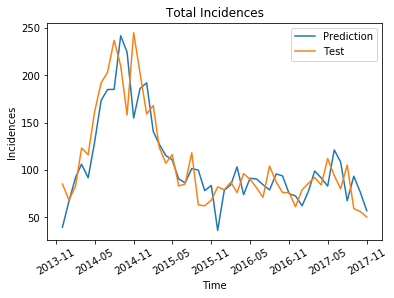

In [124]:
plt.plot(pred_t, k, label = 'Prediction')
plt.plot(pred_t, y_t, label = 'Test')
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 30)
plt.title('Total Incidences')
plt.xlabel('Time')
plt.ylabel('Incidences')
plt.legend()
plt.savefig('Total Predictions', dpi = 650)
plt.show()

## Small Architectures

In [ ]:
model_1a = Sequential()

# First layer
model_1a.add(Dense(X_train.shape[1] - 2, input_dim = X_train.shape[1]))
model_1a.add(Activation('linear'))
model_1a.add(Dropout(0.05))

# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_1a.add(Dense(X_train.shape[1] - 8))
model_1a.add(Activation('linear'))
model_1a.add(Dropout(0.1))

model_1a.add(Dense(X_train.shape[1] - 8))
model_1a.add(Activation('linear'))

# Final layer
model_1a.add(Dense(y_train.shape[1]))

# Print the parameters
model_1a.summary()

In [ ]:
H = model_1a.compile(loss = mean_squared_error,  optimizer = 'adam', metrics = ['mse', 'accuracy'])
H = model_1a.fit(X_train, y_train, epochs =  40,  validation_data = (X_val, y_val))

In [ ]:
plt.plot(H.history['val_mean_squared_error'], label = 'Validation Error')
plt.plot(H.history['mean_squared_error'], label = 'Mean Square Error' )
plt.legend()
plt.show()

In [ ]:
predictions = np.round(model_1a.predict(X_test))

In [ ]:
np_y_test = np.array(y_test)

### Naive Predictor

The idea is to develop a Naive Predictor that copies the previous value of patients to the new one. 
This can be easily done just by calculating the r2 and Mean absolute error between the shift and the prediction.

In [ ]:
print('Naive Predictor Metrics:')
for i in ['HVB', 'WB', 'BZO']:
    print(i+' R2 score: ',r2_score(X_test[i], y_test[i+'+1']), 
          ' Mean Absolute Error :', mean_absolute_error(X_test[i], y_test[i+'+1']))

In [ ]:
print(r2_score(predictions, np_y_test))
print(mean_absolute_error(predictions, np_y_test))

for i, j in enumerate(['HVB', 'WB ', 'BZO']):
    print(j, 'R2 score :', r2_score(predictions[:,i], np_y_test[:,i]), 
          'Mean Absolute Error', mean_absolute_error(predictions[:,i], np_y_test[:,i]))

In [ ]:
prediction_dataframe = pd.DataFrame({'Date' : data2['Date'][-len(y_test):], 
                         'HVB':predictions[:,0],
                       'WB': predictions[:,1],
                       'BZO': predictions[:,2]}).reset_index(drop = True)
prediction_dataframe['Date'] = pd.to_datetime(prediction_dataframe['Date'], format = '%Y-%m')

for i in ['HVB', 'WB', 'BZO']:
    plt.plot(prediction_dataframe['Date'], prediction_dataframe[i], label = 'Pred'  )
    plt.plot(prediction_dataframe['Date'], y_test[i+'+1'], label = 'Test')
    plt.legend()
    plt.title('Predictions against the test Data in '+i)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 45)
    #plt.savefig('NNυ'+i, dpi = 800)
    plt.show()

In [ ]:
for i in ['HVB', 'WB', 'BZO']:
    plt.plot(prediction_dataframe['Date'], prediction_dataframe[i], label = 'Pred')
    plt.plot(prediction_dataframe['Date'], y_test[i+'+1'], label = 'Test')
    plt.plot(data2['Date'][:- len(X_test)], X_T[i], label = 'Train')
    plt.legend()
    plt.title('Predictions against the test Data in '+i)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 45)
    plt.ylabel('Incidences')
    #plt.savefig('Allυ'+i, dpi = 1000)
    plt.show()

In [ ]:
plt.plot(data2['Date'], data2['Trends'])
plt.title('Google Trends in Brabant')
plt.show()

## Make the interval

In [ ]:
initializations = 20
NBest_initializations = 5

model_a = Sequential()

# First layer
model_a.add(Dense(X_train.shape[1] + 4, input_dim = X_train.shape[1]))
model_a.add(Activation('linear'))
model_a.add(Dropout(0.1))

# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_a.add(Dense(X_train.shape[1] ))
model_a.add(Activation('linear'))
model_a.add(Dropout(0.15))

model_a.add(Dense(X_train.shape[1] - 2))
model_a.add(Activation('linear'))

# Final layer
model_a.add(Dense(y_train.shape[1]))
model_a.compile(loss = mean_squared_error,  optimizer = 'adam', metrics = ['mse', 'accuracy'])

# Print the parameters
#model_1a.summary()

r2_dict = {}
y_pred_df = pd.DataFrame()

best_performance_list = []


for initialization in range(initializations):
    model_a.fit(X_train, y_train, epochs =  60,  validation_data = (X_val, y_val))
    predictions = np.round(model_a.predict(X_test))
    r2_dict[initialization] = r2_score(y_test, predictions)
    
    # Make a column for each region and model in the y_pred_df
    
    for counter, region in enumerate(['HVB', 'WB', 'BZO']):
        y_pred_df[str(initialization)+region] = predictions[:,counter]
    
for best_init in range(NBest_initializations):
    best_performance_list.append(max(r2_dict, key = r2_dict.get))
    del r2_dict[max(r2_dict, key=r2_dict.get)]
    
best_columns = []

for i in best_performance_list:
    for region in ['HVB', 'WB', 'BZO']:
        best_columns.append(str(i)+region)

y_pred_df = y_pred_df[best_columns]


In [ ]:
y_pred_df.head()

In [ ]:
temp_reg = []
for region in ['HVB', 'WB', 'BZO']:
    
    for best_i in best_performance_list:
        temp_reg.append(str(best_i)+region)
    
y_pred_df['Ave WB'] = (y_pred_df['5WB'] + y_pred_df['3WB'] + y_pred_df['18WB'])/3

In [ ]:
y_pred_df['Ave WB']

In [ ]:
plt.plot(y_pred_df['Ave WB'])
plt.plot(y_test['WB+1'].reset_index(drop = True))
plt.show()

In [ ]:
y_test

In [ ]:
max(r2_dict, key=r2_dict.get)

In [ ]:
y_test.head()

In [ ]:
r2_dict

In [ ]:
model_1a.predict(X_test)

In [ ]:
model_1a.predict(X_test)

## 2nd Model with Dropout

In [ ]:
model_2a = Sequential()

# First layer
model_2a.add(Dense(X_train.shape[1] + 2, input_dim = X_train.shape[1]))
model_2a.add(Activation('linear'))


# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_2a.add(Dense(X_train.shape[1] + 4))
model_2a.add(Activation('relu'))
model_2a.add(Dropout(0.2))

# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_2a.add(Dense(X_train.shape[1] - 6))
model_2a.add(Activation('linear'))

# Final layer
model_2a.add(Dense(y_train.shape[1]))

# Print the parameters
model_2a.summary()

In [ ]:
model_2a.compile(loss = mean_squared_error,  optimizer = 'adam', metrics = ['mse'])
H2 = model_1a.fit(X_train, y_train, epochs =  80,  validation_data = (X_val, y_val))

In [ ]:
plt.plot(H2.history['val_mean_squared_error'], label = 'Validation Error')
plt.plot(H2.history['mean_squared_error'], label = 'Mean Square Error' )
plt.legend()
plt.show()

In [ ]:
predictions2 = model_2a.predict(X_test)

In [ ]:
print(r2_score(predictions2, np_y_test))

for i, j in enumerate(['HVB', 'WB ', 'BZO']):
    print(j, 'R2 score :', r2_score(predictions[:,i], np_y_test[:,i]), 
          'Mean Absolute Error', mean_absolute_error(predictions[:,i], np_y_test[:,i]))

In [ ]:
prediction_dataframe2 = pd.DataFrame({'Date' : data2['Date'][-len(y_test):], 
                         'HVB':predictions2[:,0],
                       'WB': predictions2[:,1],
                       'BZO': predictions2[:,2]}).reset_index(drop = True)
prediction_dataframe2['Date'] = pd.to_datetime(prediction_dataframe2['Date'], format = '%Y-%m')

for i in ['HVB', 'WB', 'BZO']:
    plt.plot(prediction_dataframe2['Date'], prediction_dataframe2[i], label = 'Pred')
    plt.plot(prediction_dataframe2['Date'], y_test[i+'+1'], label = 'Test')
    plt.legend()
    plt.title('Predictions against the test Data in '+i)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 45)
    #plt.savefig('NN '+i)
    plt.show()

## Normalization

Here we normalize the columns to see if the performance of the model gets improved.

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = data2[['HVB', 'HVB-1', 'HVB-2', 'HVB-3',  
          'WB', 'WB-1', 'WB-2', 'WB-3', 
          'BZO', 'BZO-1', 'BZO-2', 'BZO-3', 
          'Trends', 'Trends-1', 'Trends-2']].copy()

scaler.fit(X_scaled)

X_scaled = scaler.fit_transform(X_scaled)

y_scaled = data2[['HVB+1', 'WB+1', 'BZO+1']].copy()

X_sc_T, X_sc_test, y_T, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.33, shuffle = False)
X_sc_train, X_sc_val, y_train, y_val = train_test_split(X_sc_T, y_T, test_size = 0.15, shuffle = True)

In [ ]:
model_1c = Sequential()

# First layer
model_1c.add(Dense(X_sc_train.shape[1] + 4, input_dim = X_sc_train.shape[1]))
model_1c.add(Activation('linear'))
model_1c.add(Dropout(0.15))

# Second layer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
model_1c.add(Dense(X_train.shape[1] + 2))
model_1c.add(Activation('linear'))


model_1c.add(Dense(X_train.shape[1]))
model_1c.add(Activation('relu'))

# Final layer
model_1c.add(Dense(y_train.shape[1]))

# Print the parameters
model_1c.summary()

In [ ]:
H = model_1c.compile(loss = mean_squared_error,  optimizer = 'adam', metrics = ['mse', 'accuracy'])
H = model_1c.fit(X_sc_train, y_train, epochs =  160,  validation_data = (X_val, y_val))

In [ ]:
sc_predictions = np.round(model_1c.predict(X_sc_test))

In [ ]:
print(r2_score(sc_predictions, np_y_test))

for i, j in enumerate(['HVB', 'WB ', 'BZO']):
    print(j, 'R2 score :', r2_score(sc_predictions[:,i], np_y_test[:,i]), 
          'Mean Absolute Error', mean_absolute_error(predictions[:,i], np_y_test[:,i]))

In [ ]:
sc_prediction_dataframe = pd.DataFrame({'Date' : data2['Date'][-len(y_test):], 
                         'HVB': sc_predictions[:,0],
                       'WB': sc_predictions[:,1],
                       'BZO': sc_predictions[:,2]}).reset_index(drop = True)
sc_prediction_dataframe['Date'] = pd.to_datetime(sc_prediction_dataframe['Date'], format = '%Y-%m')

for i in ['HVB', 'WB', 'BZO']:
    plt.plot(sc_prediction_dataframe['Date'], sc_prediction_dataframe[i], label = 'Pred'  )
    plt.plot(sc_prediction_dataframe['Date'], y_test[i+'+1'], label = 'Test')
    plt.legend()
    plt.title('Predictions against the test Data in '+i)
    plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 45)
    #plt.savefig('NNζ'+i)
    plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

upper_bound = go.Scatter(
    name='Upper Bound',
    x=df['Time'],
    y=df['10 Min Sampled Avg']+df['10 Min Std Dev'],
    mode='lines',
    marker=dict(color="444"),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

trace = go.Scatter(
    name='Measurement',
    x=df['Time'],
    y=df['10 Min Sampled Avg'],
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound',
    x=df['Time'],
    y=df['10 Min Sampled Avg']-df['10 Min Std Dev'],
    marker=dict(color="444"),
    line=dict(width=0),
    mode='lines')

# Trace order can be important
# with continuous error bars
data = [lower_bound, trace, upper_bound]

layout = go.Layout(
    yaxis=dict(title='Wind speed (m/s)'),
    title='Continuous, variable value error bars.<br>Notice the hover text!',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pandas-continuous-error-bars')

In [ ]:
di = pd.DataFrame()

In [ ]:
di['1'] = range(6)

In [ ]:
di